# 7T coil comparison: processing of human data

# 7T coil comparison: processing of human data

## Setup environment

In [1]:
# Necessary imports

from datetime import datetime, timedelta
import os
import json
import glob
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import pandas as pd
from scipy.stats import iqr
import shutil
import zipfile
from scipy.interpolate import interp1d
from scipy.ndimage import uniform_filter1d
from pathlib import Path

%matplotlib inline

In [ ]:
start_time = datetime.now()

In [ ]:
# Download data from OpenNeuro ⏳

!openneuro-py download --dataset ds005025 --target-dir data-human/

In [2]:
# Define useful variables
path_data = os.path.join(os.getcwd(), "data-human/")
print(f"path_data: {path_data}")
path_labels = os.path.join(path_data, "derivatives", "labels")
path_qc = os.path.join(path_data, "qc")
subjects = [os.path.basename(subject_path) for subject_path in sorted(glob.glob(os.path.join(path_data, "sub-*")))]
print(f"subjects: {subjects}")

# Create output folder
path_results = os.path.join(path_data, "derivatives", "results")
os.makedirs(path_results, exist_ok=True)

path_data: /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/
subjects: ['sub-CRMBM1', 'sub-CRMBM2', 'sub-CRMBM3', 'sub-MGH1', 'sub-MGH2', 'sub-MGH3', 'sub-MNI1', 'sub-MNI2', 'sub-MNI3', 'sub-MPI1', 'sub-MPI2', 'sub-MPI3', 'sub-MSSM1', 'sub-MSSM2', 'sub-MSSM3', 'sub-NTNU1', 'sub-NTNU2', 'sub-NTNU3', 'sub-UCL1', 'sub-UCL2', 'sub-UCL3']


## MP2RAGE segmentation and vertebral labeling 

In [ ]:
# Run segmentation on MP2RAGE scan ⏳

for subject in subjects:
    os.chdir(os.path.join(path_data, subject, "anat"))
    fname_manual_seg = os.path.join(path_labels, subject, "anat", f"{subject}_UNIT1_label-SC_seg.nii.gz")
    if os.path.exists(fname_manual_seg):
        # Manual segmentation already exists. Copy it to local folder
        print(f"{subject}: Manual segmentation found\n")
        shutil.copyfile(fname_manual_seg, f"{subject}_UNIT1_seg.nii.gz")
        # Generate QC report to make sure the manual segmentation is correct
        !sct_qc -i {subject}_UNIT1.nii.gz -s {subject}_UNIT1_seg.nii.gz -p sct_deepseg_sc -qc {path_qc} -qc-subject {subject}
    else:
        # Manual segmentation does not exist. Run automatic segmentation.
        print(f"{subject}: Manual segmentation not found")
        !sct_deepseg -i "{subject}_UNIT1.nii.gz" -task seg_sc_contrast_agnostic -thr 0 -qc {path_qc}

sub-MGH2: Manual segmentation not found

--
Spinal Cord Toolbox (6.2)

sct_deepseg -i sub-MGH2_UNIT1.nii.gz -task seg_sc_contrast_agnostic -thr 0 -qc /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/qc
--

usage: sct_deepseg [-i <file> [<file> ...]] [-c <file> [<file> ...]] [-o <str>]
                   [-task <str> [<str> ...]] [-list-tasks]
                   [-install-task {seg_sc_t2star,seg_mice_sc,seg_mice_gm,seg_tumor_t2,seg_ms_sc_mp2rage,seg_ms_lesion_mp2rage,seg_tumor-edema-cavity_t1-t2,seg_exvivo_gm-wm_t2,seg_gm_sc_7t_t2star,seg_lumbar_sc_t2w,seg_sc_contrast_agnostic,seg_sc_lesion_t2w_sci,seg_spinal_rootlets_t2w,seg_mouse_gm_wm_t1w}]
                   [-thr <float>] [-r {0,1}] [-largest KEEP_LARGEST]
                   [-fill-holes {0,1}]
                   [-remove-small REMOVE_SMALL [REMOVE_SMALL ...]] [-v <int>]
                   [-h]

Segment an anatomical structure or pathologies according to the specified deep
learning 

sub-MNI1: Manual segmentation not found

--
Spinal Cord Toolbox (6.2)

sct_deepseg -i sub-MNI1_UNIT1.nii.gz -task seg_sc_contrast_agnostic -thr 0 -qc /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/qc
--

usage: sct_deepseg [-i <file> [<file> ...]] [-c <file> [<file> ...]] [-o <str>]
                   [-task <str> [<str> ...]] [-list-tasks]
                   [-install-task {seg_sc_t2star,seg_mice_sc,seg_mice_gm,seg_tumor_t2,seg_ms_sc_mp2rage,seg_ms_lesion_mp2rage,seg_tumor-edema-cavity_t1-t2,seg_exvivo_gm-wm_t2,seg_gm_sc_7t_t2star,seg_lumbar_sc_t2w,seg_sc_contrast_agnostic,seg_sc_lesion_t2w_sci,seg_spinal_rootlets_t2w,seg_mouse_gm_wm_t1w}]
                   [-thr <float>] [-r {0,1}] [-largest KEEP_LARGEST]
                   [-fill-holes {0,1}]
                   [-remove-small REMOVE_SMALL [REMOVE_SMALL ...]] [-v <int>]
                   [-h]

Segment an anatomical structure or pathologies according to the specified deep
learning 

sub-MNI3: Manual segmentation not found

--
Spinal Cord Toolbox (6.2)

sct_deepseg -i sub-MNI3_UNIT1.nii.gz -task seg_sc_contrast_agnostic -thr 0 -qc /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/qc
--

usage: sct_deepseg [-i <file> [<file> ...]] [-c <file> [<file> ...]] [-o <str>]
                   [-task <str> [<str> ...]] [-list-tasks]
                   [-install-task {seg_sc_t2star,seg_mice_sc,seg_mice_gm,seg_tumor_t2,seg_ms_sc_mp2rage,seg_ms_lesion_mp2rage,seg_tumor-edema-cavity_t1-t2,seg_exvivo_gm-wm_t2,seg_gm_sc_7t_t2star,seg_lumbar_sc_t2w,seg_sc_contrast_agnostic,seg_sc_lesion_t2w_sci,seg_spinal_rootlets_t2w,seg_mouse_gm_wm_t1w}]
                   [-thr <float>] [-r {0,1}] [-largest KEEP_LARGEST]
                   [-fill-holes {0,1}]
                   [-remove-small REMOVE_SMALL [REMOVE_SMALL ...]] [-v <int>]
                   [-h]

Segment an anatomical structure or pathologies according to the specified deep
learning 

sub-MPI2: Manual segmentation not found

--
Spinal Cord Toolbox (6.2)

sct_deepseg -i sub-MPI2_UNIT1.nii.gz -task seg_sc_contrast_agnostic -thr 0 -qc /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/qc
--

usage: sct_deepseg [-i <file> [<file> ...]] [-c <file> [<file> ...]] [-o <str>]
                   [-task <str> [<str> ...]] [-list-tasks]
                   [-install-task {seg_sc_t2star,seg_mice_sc,seg_mice_gm,seg_tumor_t2,seg_ms_sc_mp2rage,seg_ms_lesion_mp2rage,seg_tumor-edema-cavity_t1-t2,seg_exvivo_gm-wm_t2,seg_gm_sc_7t_t2star,seg_lumbar_sc_t2w,seg_sc_contrast_agnostic,seg_sc_lesion_t2w_sci,seg_spinal_rootlets_t2w,seg_mouse_gm_wm_t1w}]
                   [-thr <float>] [-r {0,1}] [-largest KEEP_LARGEST]
                   [-fill-holes {0,1}]
                   [-remove-small REMOVE_SMALL [REMOVE_SMALL ...]] [-v <int>]
                   [-h]

Segment an anatomical structure or pathologies according to the specified deep
learning 

sub-MSSM1: Manual segmentation not found

--
Spinal Cord Toolbox (6.2)

sct_deepseg -i sub-MSSM1_UNIT1.nii.gz -task seg_sc_contrast_agnostic -thr 0 -qc /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/qc
--

usage: sct_deepseg [-i <file> [<file> ...]] [-c <file> [<file> ...]] [-o <str>]
                   [-task <str> [<str> ...]] [-list-tasks]
                   [-install-task {seg_sc_t2star,seg_mice_sc,seg_mice_gm,seg_tumor_t2,seg_ms_sc_mp2rage,seg_ms_lesion_mp2rage,seg_tumor-edema-cavity_t1-t2,seg_exvivo_gm-wm_t2,seg_gm_sc_7t_t2star,seg_lumbar_sc_t2w,seg_sc_contrast_agnostic,seg_sc_lesion_t2w_sci,seg_spinal_rootlets_t2w,seg_mouse_gm_wm_t1w}]
                   [-thr <float>] [-r {0,1}] [-largest KEEP_LARGEST]
                   [-fill-holes {0,1}]
                   [-remove-small REMOVE_SMALL [REMOVE_SMALL ...]] [-v <int>]
                   [-h]

Segment an anatomical structure or pathologies according to the specified deep
learnin

sub-MSSM3: Manual segmentation not found

--
Spinal Cord Toolbox (6.2)

sct_deepseg -i sub-MSSM3_UNIT1.nii.gz -task seg_sc_contrast_agnostic -thr 0 -qc /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/qc
--

usage: sct_deepseg [-i <file> [<file> ...]] [-c <file> [<file> ...]] [-o <str>]
                   [-task <str> [<str> ...]] [-list-tasks]
                   [-install-task {seg_sc_t2star,seg_mice_sc,seg_mice_gm,seg_tumor_t2,seg_ms_sc_mp2rage,seg_ms_lesion_mp2rage,seg_tumor-edema-cavity_t1-t2,seg_exvivo_gm-wm_t2,seg_gm_sc_7t_t2star,seg_lumbar_sc_t2w,seg_sc_contrast_agnostic,seg_sc_lesion_t2w_sci,seg_spinal_rootlets_t2w,seg_mouse_gm_wm_t1w}]
                   [-thr <float>] [-r {0,1}] [-largest KEEP_LARGEST]
                   [-fill-holes {0,1}]
                   [-remove-small REMOVE_SMALL [REMOVE_SMALL ...]] [-v <int>]
                   [-h]

Segment an anatomical structure or pathologies according to the specified deep
learnin

sub-NTNU2: Manual segmentation not found

--
Spinal Cord Toolbox (6.2)

sct_deepseg -i sub-NTNU2_UNIT1.nii.gz -task seg_sc_contrast_agnostic -thr 0 -qc /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/qc
--

usage: sct_deepseg [-i <file> [<file> ...]] [-c <file> [<file> ...]] [-o <str>]
                   [-task <str> [<str> ...]] [-list-tasks]
                   [-install-task {seg_sc_t2star,seg_mice_sc,seg_mice_gm,seg_tumor_t2,seg_ms_sc_mp2rage,seg_ms_lesion_mp2rage,seg_tumor-edema-cavity_t1-t2,seg_exvivo_gm-wm_t2,seg_gm_sc_7t_t2star,seg_lumbar_sc_t2w,seg_sc_contrast_agnostic,seg_sc_lesion_t2w_sci,seg_spinal_rootlets_t2w,seg_mouse_gm_wm_t1w}]
                   [-thr <float>] [-r {0,1}] [-largest KEEP_LARGEST]
                   [-fill-holes {0,1}]
                   [-remove-small REMOVE_SMALL [REMOVE_SMALL ...]] [-v <int>]
                   [-h]

Segment an anatomical structure or pathologies according to the specified deep
learnin

sub-UCL1: Manual segmentation not found

--
Spinal Cord Toolbox (6.2)

sct_deepseg -i sub-UCL1_UNIT1.nii.gz -task seg_sc_contrast_agnostic -thr 0 -qc /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/qc
--

usage: sct_deepseg [-i <file> [<file> ...]] [-c <file> [<file> ...]] [-o <str>]
                   [-task <str> [<str> ...]] [-list-tasks]
                   [-install-task {seg_sc_t2star,seg_mice_sc,seg_mice_gm,seg_tumor_t2,seg_ms_sc_mp2rage,seg_ms_lesion_mp2rage,seg_tumor-edema-cavity_t1-t2,seg_exvivo_gm-wm_t2,seg_gm_sc_7t_t2star,seg_lumbar_sc_t2w,seg_sc_contrast_agnostic,seg_sc_lesion_t2w_sci,seg_spinal_rootlets_t2w,seg_mouse_gm_wm_t1w}]
                   [-thr <float>] [-r {0,1}] [-largest KEEP_LARGEST]
                   [-fill-holes {0,1}]
                   [-remove-small REMOVE_SMALL [REMOVE_SMALL ...]] [-v <int>]
                   [-h]

Segment an anatomical structure or pathologies according to the specified deep
learning 

sub-UCL3: Manual segmentation not found

--
Spinal Cord Toolbox (6.2)

sct_deepseg -i sub-UCL3_UNIT1.nii.gz -task seg_sc_contrast_agnostic -thr 0 -qc /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/qc
--

usage: sct_deepseg [-i <file> [<file> ...]] [-c <file> [<file> ...]] [-o <str>]
                   [-task <str> [<str> ...]] [-list-tasks]
                   [-install-task {seg_sc_t2star,seg_mice_sc,seg_mice_gm,seg_tumor_t2,seg_ms_sc_mp2rage,seg_ms_lesion_mp2rage,seg_tumor-edema-cavity_t1-t2,seg_exvivo_gm-wm_t2,seg_gm_sc_7t_t2star,seg_lumbar_sc_t2w,seg_sc_contrast_agnostic,seg_sc_lesion_t2w_sci,seg_spinal_rootlets_t2w,seg_mouse_gm_wm_t1w}]
                   [-thr <float>] [-r {0,1}] [-largest KEEP_LARGEST]
                   [-fill-holes {0,1}]
                   [-remove-small REMOVE_SMALL [REMOVE_SMALL ...]] [-v <int>]
                   [-h]

Segment an anatomical structure or pathologies according to the specified deep
learning 

In [ ]:
# Label vertebrae

for subject in subjects:
    os.chdir(os.path.join(path_data, subject, "anat"))
    fname_manual_labels = os.path.join(path_labels, subject, "anat", f"{subject}_UNIT1_label-disc.nii.gz")
    if os.path.exists(fname_manual_labels):
        # Use manual disc labels to generate labeled segmentation.
        print(f"{subject}: Manual labels found\n")
        !sct_label_utils -i {subject}_UNIT1_seg.nii.gz -disc {fname_manual_labels} -o {subject}_UNIT1_seg_labeled.nii.gz
        # Generate QC report to assess labeled segmentation
        !sct_qc -i {subject}_UNIT1.nii.gz -s {subject}_UNIT1_seg_labeled.nii.gz -p sct_label_vertebrae -qc {path_qc} -qc-subject {subject}
    else:
        # Manual labels do not exist. They should!
        print(f"{subject}: Manual labels not found.")

In [ ]:
# Crop MP2RAGE for faster processing and better registration results
dilation_kernel="20x20x0"

for subject in subjects:
    os.chdir(os.path.join(path_data, subject, "anat"))
    !sct_crop_image -i {subject}_inv-1_part-mag_MP2RAGE.nii.gz -m {subject}_UNIT1_seg.nii.gz -dilate {dilation_kernel} -o {subject}_inv-1_part-mag_MP2RAGE_crop.nii.gz 
    !sct_crop_image -i {subject}_UNIT1.nii.gz -m {subject}_UNIT1_seg.nii.gz -dilate {dilation_kernel} -o {subject}_UNIT1_crop.nii.gz
    !sct_crop_image -i {subject}_UNIT1_seg.nii.gz -m {subject}_UNIT1_seg.nii.gz -dilate {dilation_kernel} -o {subject}_UNIT1_seg_crop.nii.gz
    !sct_crop_image -i {subject}_UNIT1_seg_labeled.nii.gz -m {subject}_UNIT1_seg.nii.gz -dilate {dilation_kernel} -o {subject}_UNIT1_seg_labeled_crop.nii.gz


--
Spinal Cord Toolbox (6.2)

sct_crop_image -i sub-MGH1_UNIT1_seg.nii.gz -m sub-MGH1_UNIT1_seg.nii.gz -dilate 20x20x0 -o sub-MGH1_UNIT1_seg_crop.nii.gz
--

Bounding box: x=[64, 125], y=[61, 160], z=[79, 256]
Cropping the image...
File sub-MGH1_UNIT1_seg_crop.nii.gz already exists. Will overwrite it.

Done! To view results, type:
fsleyes sub-MGH1_UNIT1_seg.nii.gz sub-MGH1_UNIT1_seg_crop.nii.gz &


--
Spinal Cord Toolbox (6.2)

sct_crop_image -i sub-MGH1_UNIT1_seg_labeled.nii.gz -m sub-MGH1_UNIT1_seg.nii.gz -dilate 20x20x0 -o sub-MGH1_UNIT1_seg_labeled_crop.nii.gz
--

Bounding box: x=[64, 125], y=[61, 160], z=[79, 256]
Cropping the image...
File sub-MGH1_UNIT1_seg_labeled_crop.nii.gz already exists. Will overwrite it.

Done! To view results, type:
fsleyes sub-MGH1_UNIT1_seg_labeled.nii.gz sub-MGH1_UNIT1_seg_labeled_crop.nii.gz &


--
Spinal Cord Toolbox (6.2)

sct_crop_image -i sub-MGH2_inv-1_part-mag_MP2RAGE.nii.gz -m sub-MGH2_UNIT1_seg.nii.gz -dilate 20x20x0 -o sub-MGH2_inv-1_part-ma


--
Spinal Cord Toolbox (6.2)

sct_crop_image -i sub-MGH3_UNIT1_seg.nii.gz -m sub-MGH3_UNIT1_seg.nii.gz -dilate 20x20x0 -o sub-MGH3_UNIT1_seg_crop.nii.gz
--

Bounding box: x=[44, 124], y=[38, 165], z=[26, 256]
Cropping the image...
File sub-MGH3_UNIT1_seg_crop.nii.gz already exists. Will overwrite it.

Done! To view results, type:
fsleyes sub-MGH3_UNIT1_seg.nii.gz sub-MGH3_UNIT1_seg_crop.nii.gz &


--
Spinal Cord Toolbox (6.2)

sct_crop_image -i sub-MGH3_UNIT1_seg_labeled.nii.gz -m sub-MGH3_UNIT1_seg.nii.gz -dilate 20x20x0 -o sub-MGH3_UNIT1_seg_labeled_crop.nii.gz
--

Bounding box: x=[44, 124], y=[38, 165], z=[26, 256]
Cropping the image...
File sub-MGH3_UNIT1_seg_labeled_crop.nii.gz already exists. Will overwrite it.

Done! To view results, type:
fsleyes sub-MGH3_UNIT1_seg_labeled.nii.gz sub-MGH3_UNIT1_seg_labeled_crop.nii.gz &


--
Spinal Cord Toolbox (6.2)

sct_crop_image -i sub-MNI1_inv-1_part-mag_MP2RAGE.nii.gz -m sub-MNI1_UNIT1_seg.nii.gz -dilate 20x20x0 -o sub-MNI1_inv-1_part-ma


--
Spinal Cord Toolbox (6.2)

sct_crop_image -i sub-MNI2_UNIT1_seg.nii.gz -m sub-MNI2_UNIT1_seg.nii.gz -dilate 20x20x0 -o sub-MNI2_UNIT1_seg_crop.nii.gz
--

Bounding box: x=[92, 153], y=[40, 114], z=[3, 339]
Cropping the image...
File sub-MNI2_UNIT1_seg_crop.nii.gz already exists. Will overwrite it.

Done! To view results, type:
fsleyes sub-MNI2_UNIT1_seg.nii.gz sub-MNI2_UNIT1_seg_crop.nii.gz &


--
Spinal Cord Toolbox (6.2)

sct_crop_image -i sub-MNI2_UNIT1_seg_labeled.nii.gz -m sub-MNI2_UNIT1_seg.nii.gz -dilate 20x20x0 -o sub-MNI2_UNIT1_seg_labeled_crop.nii.gz
--

Bounding box: x=[92, 153], y=[40, 114], z=[3, 339]
Cropping the image...
File sub-MNI2_UNIT1_seg_labeled_crop.nii.gz already exists. Will overwrite it.

Done! To view results, type:
fsleyes sub-MNI2_UNIT1_seg_labeled.nii.gz sub-MNI2_UNIT1_seg_labeled_crop.nii.gz &


--
Spinal Cord Toolbox (6.2)

sct_crop_image -i sub-MNI3_inv-1_part-mag_MP2RAGE.nii.gz -m sub-MNI3_UNIT1_seg.nii.gz -dilate 20x20x0 -o sub-MNI3_inv-1_part-mag_


--
Spinal Cord Toolbox (6.2)

sct_crop_image -i sub-MPI1_UNIT1_seg.nii.gz -m sub-MPI1_UNIT1_seg.nii.gz -dilate 20x20x0 -o sub-MPI1_UNIT1_seg_crop.nii.gz
--

Bounding box: x=[96, 164], y=[29, 118], z=[9, 275]
Cropping the image...
File sub-MPI1_UNIT1_seg_crop.nii.gz already exists. Will overwrite it.

Done! To view results, type:
fsleyes sub-MPI1_UNIT1_seg.nii.gz sub-MPI1_UNIT1_seg_crop.nii.gz &


--
Spinal Cord Toolbox (6.2)

sct_crop_image -i sub-MPI1_UNIT1_seg_labeled.nii.gz -m sub-MPI1_UNIT1_seg.nii.gz -dilate 20x20x0 -o sub-MPI1_UNIT1_seg_labeled_crop.nii.gz
--

Bounding box: x=[96, 164], y=[29, 118], z=[9, 275]
Cropping the image...
File sub-MPI1_UNIT1_seg_labeled_crop.nii.gz already exists. Will overwrite it.

Done! To view results, type:
fsleyes sub-MPI1_UNIT1_seg_labeled.nii.gz sub-MPI1_UNIT1_seg_labeled_crop.nii.gz &


--
Spinal Cord Toolbox (6.2)

sct_crop_image -i sub-MPI2_inv-1_part-mag_MP2RAGE.nii.gz -m sub-MPI2_UNIT1_seg.nii.gz -dilate 20x20x0 -o sub-MPI2_inv-1_part-mag_


--
Spinal Cord Toolbox (6.2)

sct_crop_image -i sub-MPI3_UNIT1_seg.nii.gz -m sub-MPI3_UNIT1_seg.nii.gz -dilate 20x20x0 -o sub-MPI3_UNIT1_seg_crop.nii.gz
--

Bounding box: x=[94, 176], y=[18, 192], z=[6, 287]
Cropping the image...
File sub-MPI3_UNIT1_seg_crop.nii.gz already exists. Will overwrite it.

Done! To view results, type:
fsleyes sub-MPI3_UNIT1_seg.nii.gz sub-MPI3_UNIT1_seg_crop.nii.gz &


--
Spinal Cord Toolbox (6.2)

sct_crop_image -i sub-MPI3_UNIT1_seg_labeled.nii.gz -m sub-MPI3_UNIT1_seg.nii.gz -dilate 20x20x0 -o sub-MPI3_UNIT1_seg_labeled_crop.nii.gz
--

Bounding box: x=[94, 176], y=[18, 192], z=[6, 287]
Cropping the image...
File sub-MPI3_UNIT1_seg_labeled_crop.nii.gz already exists. Will overwrite it.

Done! To view results, type:
fsleyes sub-MPI3_UNIT1_seg_labeled.nii.gz sub-MPI3_UNIT1_seg_labeled_crop.nii.gz &


--
Spinal Cord Toolbox (6.2)

sct_crop_image -i sub-MSSM1_inv-1_part-mag_MP2RAGE.nii.gz -m sub-MSSM1_UNIT1_seg.nii.gz -dilate 20x20x0 -o sub-MSSM1_inv-1_part-m


--
Spinal Cord Toolbox (6.2)

sct_crop_image -i sub-MSSM2_UNIT1_seg.nii.gz -m sub-MSSM2_UNIT1_seg.nii.gz -dilate 20x20x0 -o sub-MSSM2_UNIT1_seg_crop.nii.gz
--

Bounding box: x=[89, 175], y=[51, 130], z=[46, 357]
Cropping the image...
File sub-MSSM2_UNIT1_seg_crop.nii.gz already exists. Will overwrite it.

Done! To view results, type:
fsleyes sub-MSSM2_UNIT1_seg.nii.gz sub-MSSM2_UNIT1_seg_crop.nii.gz &


--
Spinal Cord Toolbox (6.2)

sct_crop_image -i sub-MSSM2_UNIT1_seg_labeled.nii.gz -m sub-MSSM2_UNIT1_seg.nii.gz -dilate 20x20x0 -o sub-MSSM2_UNIT1_seg_labeled_crop.nii.gz
--

Bounding box: x=[89, 175], y=[51, 130], z=[46, 357]
Cropping the image...
File sub-MSSM2_UNIT1_seg_labeled_crop.nii.gz already exists. Will overwrite it.

Done! To view results, type:
fsleyes sub-MSSM2_UNIT1_seg_labeled.nii.gz sub-MSSM2_UNIT1_seg_labeled_crop.nii.gz &


--
Spinal Cord Toolbox (6.2)

sct_crop_image -i sub-MSSM3_inv-1_part-mag_MP2RAGE.nii.gz -m sub-MSSM3_UNIT1_seg.nii.gz -dilate 20x20x0 -o sub-MSSM


--
Spinal Cord Toolbox (6.2)

sct_crop_image -i sub-NTNU1_UNIT1_seg.nii.gz -m sub-NTNU1_UNIT1_seg.nii.gz -dilate 20x20x0 -o sub-NTNU1_UNIT1_seg_crop.nii.gz
--

Bounding box: x=[90, 155], y=[61, 126], z=[53, 307]
Cropping the image...
File sub-NTNU1_UNIT1_seg_crop.nii.gz already exists. Will overwrite it.

Done! To view results, type:
fsleyes sub-NTNU1_UNIT1_seg.nii.gz sub-NTNU1_UNIT1_seg_crop.nii.gz &


--
Spinal Cord Toolbox (6.2)

sct_crop_image -i sub-NTNU1_UNIT1_seg_labeled.nii.gz -m sub-NTNU1_UNIT1_seg.nii.gz -dilate 20x20x0 -o sub-NTNU1_UNIT1_seg_labeled_crop.nii.gz
--

Bounding box: x=[90, 155], y=[61, 126], z=[53, 307]
Cropping the image...
File sub-NTNU1_UNIT1_seg_labeled_crop.nii.gz already exists. Will overwrite it.

Done! To view results, type:
fsleyes sub-NTNU1_UNIT1_seg_labeled.nii.gz sub-NTNU1_UNIT1_seg_labeled_crop.nii.gz &


--
Spinal Cord Toolbox (6.2)

sct_crop_image -i sub-NTNU2_inv-1_part-mag_MP2RAGE.nii.gz -m sub-NTNU2_UNIT1_seg.nii.gz -dilate 20x20x0 -o sub-NTNU


--
Spinal Cord Toolbox (6.2)

sct_crop_image -i sub-NTNU3_UNIT1_seg.nii.gz -m sub-NTNU3_UNIT1_seg.nii.gz -dilate 20x20x0 -o sub-NTNU3_UNIT1_seg_crop.nii.gz
--

Bounding box: x=[94, 154], y=[23, 126], z=[8, 330]
Cropping the image...
File sub-NTNU3_UNIT1_seg_crop.nii.gz already exists. Will overwrite it.

Done! To view results, type:
fsleyes sub-NTNU3_UNIT1_seg.nii.gz sub-NTNU3_UNIT1_seg_crop.nii.gz &


--
Spinal Cord Toolbox (6.2)

sct_crop_image -i sub-NTNU3_UNIT1_seg_labeled.nii.gz -m sub-NTNU3_UNIT1_seg.nii.gz -dilate 20x20x0 -o sub-NTNU3_UNIT1_seg_labeled_crop.nii.gz
--

Bounding box: x=[94, 154], y=[23, 126], z=[8, 330]
Cropping the image...
File sub-NTNU3_UNIT1_seg_labeled_crop.nii.gz already exists. Will overwrite it.

Done! To view results, type:
fsleyes sub-NTNU3_UNIT1_seg_labeled.nii.gz sub-NTNU3_UNIT1_seg_labeled_crop.nii.gz &


--
Spinal Cord Toolbox (6.2)

sct_crop_image -i sub-UCL1_inv-1_part-mag_MP2RAGE.nii.gz -m sub-UCL1_UNIT1_seg.nii.gz -dilate 20x20x0 -o sub-UCL1_inv


--
Spinal Cord Toolbox (6.2)

sct_crop_image -i sub-UCL2_UNIT1_seg.nii.gz -m sub-UCL2_UNIT1_seg.nii.gz -dilate 20x20x0 -o sub-UCL2_UNIT1_seg_crop.nii.gz
--

Bounding box: x=[77, 151], y=[25, 125], z=[73, 334]
Cropping the image...
File sub-UCL2_UNIT1_seg_crop.nii.gz already exists. Will overwrite it.

Done! To view results, type:
fsleyes sub-UCL2_UNIT1_seg.nii.gz sub-UCL2_UNIT1_seg_crop.nii.gz &


--
Spinal Cord Toolbox (6.2)

sct_crop_image -i sub-UCL2_UNIT1_seg_labeled.nii.gz -m sub-UCL2_UNIT1_seg.nii.gz -dilate 20x20x0 -o sub-UCL2_UNIT1_seg_labeled_crop.nii.gz
--

Bounding box: x=[77, 151], y=[25, 125], z=[73, 334]
Cropping the image...
File sub-UCL2_UNIT1_seg_labeled_crop.nii.gz already exists. Will overwrite it.

Done! To view results, type:
fsleyes sub-UCL2_UNIT1_seg_labeled.nii.gz sub-UCL2_UNIT1_seg_labeled_crop.nii.gz &


--
Spinal Cord Toolbox (6.2)

sct_crop_image -i sub-UCL3_inv-1_part-mag_MP2RAGE.nii.gz -m sub-UCL3_UNIT1_seg.nii.gz -dilate 20x20x0 -o sub-UCL3_inv-1_part-ma

## Register MP2RAGE to B1+ and SNR data

### Segment spinal cord on TFL

In [ ]:
# Segment spinal cord on TFL data (B1+ mapping) ⏳

# Only do this for subjects without MSSM in their name (https://github.com/spinal-cord-7t/coil-qc-code/issues/153)
subjects_without_MSSM = [subject for subject in subjects if "MSSM" not in subject]

for subject in subjects_without_MSSM:
    os.chdir(os.path.join(path_data, subject, "fmap"))
    fname_manual_seg = os.path.join(path_labels, subject, "fmap", f"{subject}_acq-anat_TB1TFL_label-SC_seg.nii.gz")
    if os.path.exists(fname_manual_seg):
        # Manual segmentation already exists. Copy it to local folder
        print(f"{subject}: Manual segmentation found\n")
        shutil.copyfile(fname_manual_seg, f"{subject}_acq-anat_TB1TFL_seg.nii.gz")
        # Generate QC report to make sure the manual segmentation is correct
        if subject in ['sub-MSSM1', 'sub-MSSM2', 'sub-MSSM3']:
            !sct_qc -i "{subject}_acq-famp_TB1TFL.nii.gz" -s "{subject}_acq-anat_TB1TFL_seg.nii.gz" -p sct_deepseg_sc -qc {path_qc} -qc-subject {subject}
        else:
            !sct_qc -i "{subject}_acq-anat_TB1TFL.nii.gz" -s "{subject}_acq-anat_TB1TFL_seg.nii.gz" -p sct_deepseg_sc -qc {path_qc} -qc-subject {subject}
    else:
        # Manual segmentation does not exist. Run automatic segmentation.
        print(f"{subject}: Manual segmentation not found")
        !sct_deepseg -i "{subject}_acq-anat_TB1TFL.nii.gz" -task seg_sc_contrast_agnostic -thr 0 -qc {path_qc} 

sub-MGH2: Manual segmentation not found

--
Spinal Cord Toolbox (6.2)

sct_deepseg -i sub-MGH2_acq-anat_TB1TFL.nii.gz -task seg_sc_contrast_agnostic -thr 0 -qc /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/qc
--

usage: sct_deepseg [-i <file> [<file> ...]] [-c <file> [<file> ...]] [-o <str>]
                   [-task <str> [<str> ...]] [-list-tasks]
                   [-install-task {seg_sc_t2star,seg_mice_sc,seg_mice_gm,seg_tumor_t2,seg_ms_sc_mp2rage,seg_ms_lesion_mp2rage,seg_tumor-edema-cavity_t1-t2,seg_exvivo_gm-wm_t2,seg_gm_sc_7t_t2star,seg_lumbar_sc_t2w,seg_sc_contrast_agnostic,seg_sc_lesion_t2w_sci,seg_spinal_rootlets_t2w,seg_mouse_gm_wm_t1w}]
                   [-thr <float>] [-r {0,1}] [-largest KEEP_LARGEST]
                   [-fill-holes {0,1}]
                   [-remove-small REMOVE_SMALL [REMOVE_SMALL ...]] [-v <int>]
                   [-h]

Segment an anatomical structure or pathologies according to the specified deep

sub-MNI1: Manual segmentation not found

--
Spinal Cord Toolbox (6.2)

sct_deepseg -i sub-MNI1_acq-anat_TB1TFL.nii.gz -task seg_sc_contrast_agnostic -thr 0 -qc /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/qc
--

usage: sct_deepseg [-i <file> [<file> ...]] [-c <file> [<file> ...]] [-o <str>]
                   [-task <str> [<str> ...]] [-list-tasks]
                   [-install-task {seg_sc_t2star,seg_mice_sc,seg_mice_gm,seg_tumor_t2,seg_ms_sc_mp2rage,seg_ms_lesion_mp2rage,seg_tumor-edema-cavity_t1-t2,seg_exvivo_gm-wm_t2,seg_gm_sc_7t_t2star,seg_lumbar_sc_t2w,seg_sc_contrast_agnostic,seg_sc_lesion_t2w_sci,seg_spinal_rootlets_t2w,seg_mouse_gm_wm_t1w}]
                   [-thr <float>] [-r {0,1}] [-largest KEEP_LARGEST]
                   [-fill-holes {0,1}]
                   [-remove-small REMOVE_SMALL [REMOVE_SMALL ...]] [-v <int>]
                   [-h]

Segment an anatomical structure or pathologies according to the specified deep

sub-MNI3: Manual segmentation not found

--
Spinal Cord Toolbox (6.2)

sct_deepseg -i sub-MNI3_acq-anat_TB1TFL.nii.gz -task seg_sc_contrast_agnostic -thr 0 -qc /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/qc
--

usage: sct_deepseg [-i <file> [<file> ...]] [-c <file> [<file> ...]] [-o <str>]
                   [-task <str> [<str> ...]] [-list-tasks]
                   [-install-task {seg_sc_t2star,seg_mice_sc,seg_mice_gm,seg_tumor_t2,seg_ms_sc_mp2rage,seg_ms_lesion_mp2rage,seg_tumor-edema-cavity_t1-t2,seg_exvivo_gm-wm_t2,seg_gm_sc_7t_t2star,seg_lumbar_sc_t2w,seg_sc_contrast_agnostic,seg_sc_lesion_t2w_sci,seg_spinal_rootlets_t2w,seg_mouse_gm_wm_t1w}]
                   [-thr <float>] [-r {0,1}] [-largest KEEP_LARGEST]
                   [-fill-holes {0,1}]
                   [-remove-small REMOVE_SMALL [REMOVE_SMALL ...]] [-v <int>]
                   [-h]

Segment an anatomical structure or pathologies according to the specified deep

sub-MPI2: Manual segmentation not found

--
Spinal Cord Toolbox (6.2)

sct_deepseg -i sub-MPI2_acq-anat_TB1TFL.nii.gz -task seg_sc_contrast_agnostic -thr 0 -qc /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/qc
--

usage: sct_deepseg [-i <file> [<file> ...]] [-c <file> [<file> ...]] [-o <str>]
                   [-task <str> [<str> ...]] [-list-tasks]
                   [-install-task {seg_sc_t2star,seg_mice_sc,seg_mice_gm,seg_tumor_t2,seg_ms_sc_mp2rage,seg_ms_lesion_mp2rage,seg_tumor-edema-cavity_t1-t2,seg_exvivo_gm-wm_t2,seg_gm_sc_7t_t2star,seg_lumbar_sc_t2w,seg_sc_contrast_agnostic,seg_sc_lesion_t2w_sci,seg_spinal_rootlets_t2w,seg_mouse_gm_wm_t1w}]
                   [-thr <float>] [-r {0,1}] [-largest KEEP_LARGEST]
                   [-fill-holes {0,1}]
                   [-remove-small REMOVE_SMALL [REMOVE_SMALL ...]] [-v <int>]
                   [-h]

Segment an anatomical structure or pathologies according to the specified deep

sub-NTNU1: Manual segmentation not found

--
Spinal Cord Toolbox (6.2)

sct_deepseg -i sub-NTNU1_acq-anat_TB1TFL.nii.gz -task seg_sc_contrast_agnostic -thr 0 -qc /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/qc
--

usage: sct_deepseg [-i <file> [<file> ...]] [-c <file> [<file> ...]] [-o <str>]
                   [-task <str> [<str> ...]] [-list-tasks]
                   [-install-task {seg_sc_t2star,seg_mice_sc,seg_mice_gm,seg_tumor_t2,seg_ms_sc_mp2rage,seg_ms_lesion_mp2rage,seg_tumor-edema-cavity_t1-t2,seg_exvivo_gm-wm_t2,seg_gm_sc_7t_t2star,seg_lumbar_sc_t2w,seg_sc_contrast_agnostic,seg_sc_lesion_t2w_sci,seg_spinal_rootlets_t2w,seg_mouse_gm_wm_t1w}]
                   [-thr <float>] [-r {0,1}] [-largest KEEP_LARGEST]
                   [-fill-holes {0,1}]
                   [-remove-small REMOVE_SMALL [REMOVE_SMALL ...]] [-v <int>]
                   [-h]

Segment an anatomical structure or pathologies according to the specified de

sub-NTNU3: Manual segmentation not found

--
Spinal Cord Toolbox (6.2)

sct_deepseg -i sub-NTNU3_acq-anat_TB1TFL.nii.gz -task seg_sc_contrast_agnostic -thr 0 -qc /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/qc
--

usage: sct_deepseg [-i <file> [<file> ...]] [-c <file> [<file> ...]] [-o <str>]
                   [-task <str> [<str> ...]] [-list-tasks]
                   [-install-task {seg_sc_t2star,seg_mice_sc,seg_mice_gm,seg_tumor_t2,seg_ms_sc_mp2rage,seg_ms_lesion_mp2rage,seg_tumor-edema-cavity_t1-t2,seg_exvivo_gm-wm_t2,seg_gm_sc_7t_t2star,seg_lumbar_sc_t2w,seg_sc_contrast_agnostic,seg_sc_lesion_t2w_sci,seg_spinal_rootlets_t2w,seg_mouse_gm_wm_t1w}]
                   [-thr <float>] [-r {0,1}] [-largest KEEP_LARGEST]
                   [-fill-holes {0,1}]
                   [-remove-small REMOVE_SMALL [REMOVE_SMALL ...]] [-v <int>]
                   [-h]

Segment an anatomical structure or pathologies according to the specified de

sub-UCL2: Manual segmentation not found

--
Spinal Cord Toolbox (6.2)

sct_deepseg -i sub-UCL2_acq-anat_TB1TFL.nii.gz -task seg_sc_contrast_agnostic -thr 0 -qc /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/qc
--

usage: sct_deepseg [-i <file> [<file> ...]] [-c <file> [<file> ...]] [-o <str>]
                   [-task <str> [<str> ...]] [-list-tasks]
                   [-install-task {seg_sc_t2star,seg_mice_sc,seg_mice_gm,seg_tumor_t2,seg_ms_sc_mp2rage,seg_ms_lesion_mp2rage,seg_tumor-edema-cavity_t1-t2,seg_exvivo_gm-wm_t2,seg_gm_sc_7t_t2star,seg_lumbar_sc_t2w,seg_sc_contrast_agnostic,seg_sc_lesion_t2w_sci,seg_spinal_rootlets_t2w,seg_mouse_gm_wm_t1w}]
                   [-thr <float>] [-r {0,1}] [-largest KEEP_LARGEST]
                   [-fill-holes {0,1}]
                   [-remove-small REMOVE_SMALL [REMOVE_SMALL ...]] [-v <int>]
                   [-h]

Segment an anatomical structure or pathologies according to the specified deep

### Register TFL to MP2RAGE

In [ ]:
# Register TFL data (B1+ mapping) to the MP2RAGE scan ⏳

for subject in subjects:
    os.chdir(os.path.join(path_data, subject, "fmap"))
    if subject in ['sub-MSSM1', 'sub-MSSM2', 'sub-MSSM3']:
        # https://github.com/spinal-cord-7t/coil-qc-code/issues/43
        # https://github.com/spinal-cord-7t/coil-qc-code/issues/153
        !sct_register_multimodal -i {subject}_acq-famp_TB1TFL.nii.gz -d ../anat/{subject}_inv-1_part-mag_MP2RAGE_crop.nii.gz -dseg ../anat/{subject}_UNIT1_seg_crop.nii.gz -identity 1 -qc "{path_qc}"
    else:
        !sct_register_multimodal -i {subject}_acq-anat_TB1TFL.nii.gz -iseg {subject}_acq-anat_TB1TFL_seg.nii.gz -d ../anat/{subject}_inv-1_part-mag_MP2RAGE_crop.nii.gz -dseg ../anat/{subject}_UNIT1_seg_crop.nii.gz -param step=1,type=seg,algo=centermass -qc "{path_qc}"


--
Spinal Cord Toolbox (6.2)

sct_register_multimodal -i sub-MPI2_acq-anat_TB1TFL.nii.gz -iseg sub-MPI2_acq-anat_TB1TFL_seg.nii.gz -d ../anat/sub-MPI2_inv-1_part-mag_MP2RAGE_crop.nii.gz -dseg ../anat/sub-MPI2_UNIT1_seg_crop.nii.gz -param step=1,type=seg,algo=centermass -qc /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/qc
--


Input parameters:
Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/nibabel/loadsave.py", line 42, in load
    stat_result = os.stat(filename)
FileNotFoundError: [Errno 2] No such file or directory: '/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-MPI2/fmap/sub-MPI2_acq-anat_TB1TFL.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_register_multimodal.py", li


--
Spinal Cord Toolbox (6.2)

sct_register_multimodal -i sub-NTNU1_acq-anat_TB1TFL.nii.gz -iseg sub-NTNU1_acq-anat_TB1TFL_seg.nii.gz -d ../anat/sub-NTNU1_inv-1_part-mag_MP2RAGE_crop.nii.gz -dseg ../anat/sub-NTNU1_UNIT1_seg_crop.nii.gz -param step=1,type=seg,algo=centermass -qc /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/qc
--


Input parameters:
Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/nibabel/loadsave.py", line 42, in load
    stat_result = os.stat(filename)
FileNotFoundError: [Errno 2] No such file or directory: '/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-NTNU1/fmap/sub-NTNU1_acq-anat_TB1TFL.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_register_multimodal.p


--
Spinal Cord Toolbox (6.2)

sct_register_multimodal -i sub-UCL3_acq-anat_TB1TFL.nii.gz -iseg sub-UCL3_acq-anat_TB1TFL_seg.nii.gz -d ../anat/sub-UCL3_inv-1_part-mag_MP2RAGE_crop.nii.gz -dseg ../anat/sub-UCL3_UNIT1_seg_crop.nii.gz -param step=1,type=seg,algo=centermass -qc /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/qc
--


Input parameters:
Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/nibabel/loadsave.py", line 42, in load
    stat_result = os.stat(filename)
FileNotFoundError: [Errno 2] No such file or directory: '/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-UCL3/fmap/sub-UCL3_acq-anat_TB1TFL.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_register_multimodal.py", li

### Register DREAM to MP2RAGE

In [ ]:
# Register DREAM data (B1+ mapping) to the MP2RAGE scan ⏳

for subject in subjects:
    os.chdir(os.path.join(path_data, subject, "fmap"))
    !sct_register_multimodal -i {subject}_acq-famp_TB1DREAM.nii.gz -d ../anat/{subject}_UNIT1_crop.nii.gz -dseg ../anat/{subject}_UNIT1_seg_crop.nii.gz -param step=1,type=im,algo=slicereg,metric=CC,smooth=1 -qc "{path_qc}"


--
Spinal Cord Toolbox (6.2)

sct_register_multimodal -i sub-MPI1_acq-famp_TB1DREAM.nii.gz -d ../anat/sub-MPI1_UNIT1_crop.nii.gz -dseg ../anat/sub-MPI1_UNIT1_seg_crop.nii.gz -param step=1,type=im,algo=slicereg,metric=CC,smooth=1 -qc /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/qc
--


Input parameters:
Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/nibabel/loadsave.py", line 42, in load
    stat_result = os.stat(filename)
FileNotFoundError: [Errno 2] No such file or directory: '/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-MPI1/fmap/sub-MPI1_acq-famp_TB1DREAM.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_register_multimodal.py", line 444, in <module>
    main(sys.argv[1


--
Spinal Cord Toolbox (6.2)

sct_register_multimodal -i sub-MSSM3_acq-famp_TB1DREAM.nii.gz -d ../anat/sub-MSSM3_UNIT1_crop.nii.gz -dseg ../anat/sub-MSSM3_UNIT1_seg_crop.nii.gz -param step=1,type=im,algo=slicereg,metric=CC,smooth=1 -qc /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/qc
--


Input parameters:
Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/nibabel/loadsave.py", line 42, in load
    stat_result = os.stat(filename)
FileNotFoundError: [Errno 2] No such file or directory: '/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-MSSM3/fmap/sub-MSSM3_acq-famp_TB1DREAM.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_register_multimodal.py", line 444, in <module>
    main(sys.a


--
Spinal Cord Toolbox (6.2)

sct_register_multimodal -i sub-UCL2_acq-famp_TB1DREAM.nii.gz -d ../anat/sub-UCL2_UNIT1_crop.nii.gz -dseg ../anat/sub-UCL2_UNIT1_seg_crop.nii.gz -param step=1,type=im,algo=slicereg,metric=CC,smooth=1 -qc /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/qc
--


Input parameters:
Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/nibabel/loadsave.py", line 42, in load
    stat_result = os.stat(filename)
FileNotFoundError: [Errno 2] No such file or directory: '/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-UCL2/fmap/sub-UCL2_acq-famp_TB1DREAM.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_register_multimodal.py", line 444, in <module>
    main(sys.argv[1

### Segment spinal cord on SNR data

In [ ]:
# Segment spinal cord on SNR data

for subject in subjects:
    os.chdir(os.path.join(path_data, subject, "fmap"))
    # Split SNR data into sub-volumes (https://github.com/spinal-cord-7t/coil-qc-code/issues/34)
    !sct_image -i {subject}_acq-coilQaSagLarge_SNR.nii.gz -split t -o {subject}_acq-coilQaSagLarge_SNR.nii.gz
    # Crop SNR data (https://github.com/spinal-cord-7t/coil-qc-code/issues/128)
    !sct_crop_image -i {subject}_acq-coilQaSagLarge_SNR_T0000.nii.gz -xmax 450 -o {subject}_acq-coilQaSagLarge_SNR_T0000.nii.gz
    !sct_crop_image -i {subject}_acq-coilQaSagLarge_SNR_T0000.nii.gz -m {subject}_acq-coilQaSagLarge_SNR_T0000.nii.gz -o {subject}_acq-coilQaSagLarge_SNR_T0000.nii.gz
    # Segment spinal cord on SNR data, unless it already exists
    fname_manual_seg = os.path.join(path_labels, subject, "fmap", f"{subject}_acq-coilQaSagLarge_SNR_T0000_label-SC_seg.nii.gz")
    if os.path.exists(fname_manual_seg):
        # Manual segmentation already exists. Copy it to local folder and put it in the same space as the SNR data
        print(f"{subject}: Manual segmentation found\n")
        !sct_register_multimodal -i {fname_manual_seg} -d {subject}_acq-coilQaSagLarge_SNR_T0000.nii.gz -o {subject}_acq-coilQaSagLarge_SNR_T0000_seg.nii.gz -identity 1 -x linear
        # Generate QC report to make sure the manual segmentation is correct
        !sct_qc -i "{subject}_acq-coilQaSagLarge_SNR_T0000.nii.gz" -s "{subject}_acq-coilQaSagLarge_SNR_T0000_seg.nii.gz" -p sct_deepseg_sc -qc {path_qc} -qc-subject {subject}
    else:
        # Manual segmentation does not exist. Run automatic segmentation.
        print(f"{subject}: Manual segmentation not found")
        !sct_deepseg -i "{subject}_acq-coilQaSagLarge_SNR_T0000.nii.gz" -task seg_sc_contrast_agnostic -thr 0 -qc {path_qc} 


--
Spinal Cord Toolbox (6.2)

sct_image -i sub-CRMBM3_acq-coilQaSagLarge_SNR.nii.gz -split t -o sub-CRMBM3_acq-coilQaSagLarge_SNR.nii.gz
--

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/nibabel/loadsave.py", line 42, in load
    stat_result = os.stat(filename)
FileNotFoundError: [Errno 2] No such file or directory: '/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-CRMBM3/fmap/sub-CRMBM3_acq-coilQaSagLarge_SNR.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 651, in <module>
    main(sys.argv[1:])
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 253, in main
    im_in_list = [Image(fname) for fname in fname_in]
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct


--
Spinal Cord Toolbox (6.2)

sct_image -i sub-MGH1_acq-coilQaSagLarge_SNR.nii.gz -split t -o sub-MGH1_acq-coilQaSagLarge_SNR.nii.gz
--

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/nibabel/loadsave.py", line 42, in load
    stat_result = os.stat(filename)
FileNotFoundError: [Errno 2] No such file or directory: '/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-MGH1/fmap/sub-MGH1_acq-coilQaSagLarge_SNR.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 651, in <module>
    main(sys.argv[1:])
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 253, in main
    im_in_list = [Image(fname) for fname in fname_in]
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.p


--
Spinal Cord Toolbox (6.2)

sct_image -i sub-MGH2_acq-coilQaSagLarge_SNR.nii.gz -split t -o sub-MGH2_acq-coilQaSagLarge_SNR.nii.gz
--

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/nibabel/loadsave.py", line 42, in load
    stat_result = os.stat(filename)
FileNotFoundError: [Errno 2] No such file or directory: '/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-MGH2/fmap/sub-MGH2_acq-coilQaSagLarge_SNR.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 651, in <module>
    main(sys.argv[1:])
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 253, in main
    im_in_list = [Image(fname) for fname in fname_in]
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.p


--
Spinal Cord Toolbox (6.2)

sct_image -i sub-MGH3_acq-coilQaSagLarge_SNR.nii.gz -split t -o sub-MGH3_acq-coilQaSagLarge_SNR.nii.gz
--

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/nibabel/loadsave.py", line 42, in load
    stat_result = os.stat(filename)
FileNotFoundError: [Errno 2] No such file or directory: '/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-MGH3/fmap/sub-MGH3_acq-coilQaSagLarge_SNR.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 651, in <module>
    main(sys.argv[1:])
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 253, in main
    im_in_list = [Image(fname) for fname in fname_in]
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.p


--
Spinal Cord Toolbox (6.2)

sct_image -i sub-MNI1_acq-coilQaSagLarge_SNR.nii.gz -split t -o sub-MNI1_acq-coilQaSagLarge_SNR.nii.gz
--

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/nibabel/loadsave.py", line 42, in load
    stat_result = os.stat(filename)
FileNotFoundError: [Errno 2] No such file or directory: '/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-MNI1/fmap/sub-MNI1_acq-coilQaSagLarge_SNR.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 651, in <module>
    main(sys.argv[1:])
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 253, in main
    im_in_list = [Image(fname) for fname in fname_in]
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.p


--
Spinal Cord Toolbox (6.2)

sct_image -i sub-MNI2_acq-coilQaSagLarge_SNR.nii.gz -split t -o sub-MNI2_acq-coilQaSagLarge_SNR.nii.gz
--

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/nibabel/loadsave.py", line 42, in load
    stat_result = os.stat(filename)
FileNotFoundError: [Errno 2] No such file or directory: '/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-MNI2/fmap/sub-MNI2_acq-coilQaSagLarge_SNR.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 651, in <module>
    main(sys.argv[1:])
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 253, in main
    im_in_list = [Image(fname) for fname in fname_in]
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.p


--
Spinal Cord Toolbox (6.2)

sct_image -i sub-MNI3_acq-coilQaSagLarge_SNR.nii.gz -split t -o sub-MNI3_acq-coilQaSagLarge_SNR.nii.gz
--

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/nibabel/loadsave.py", line 42, in load
    stat_result = os.stat(filename)
FileNotFoundError: [Errno 2] No such file or directory: '/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-MNI3/fmap/sub-MNI3_acq-coilQaSagLarge_SNR.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 651, in <module>
    main(sys.argv[1:])
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 253, in main
    im_in_list = [Image(fname) for fname in fname_in]
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.p


--
Spinal Cord Toolbox (6.2)

sct_image -i sub-MPI1_acq-coilQaSagLarge_SNR.nii.gz -split t -o sub-MPI1_acq-coilQaSagLarge_SNR.nii.gz
--

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/nibabel/loadsave.py", line 42, in load
    stat_result = os.stat(filename)
FileNotFoundError: [Errno 2] No such file or directory: '/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-MPI1/fmap/sub-MPI1_acq-coilQaSagLarge_SNR.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 651, in <module>
    main(sys.argv[1:])
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 253, in main
    im_in_list = [Image(fname) for fname in fname_in]
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.p


--
Spinal Cord Toolbox (6.2)

sct_image -i sub-MPI2_acq-coilQaSagLarge_SNR.nii.gz -split t -o sub-MPI2_acq-coilQaSagLarge_SNR.nii.gz
--

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/nibabel/loadsave.py", line 42, in load
    stat_result = os.stat(filename)
FileNotFoundError: [Errno 2] No such file or directory: '/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-MPI2/fmap/sub-MPI2_acq-coilQaSagLarge_SNR.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 651, in <module>
    main(sys.argv[1:])
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 253, in main
    im_in_list = [Image(fname) for fname in fname_in]
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.p


--
Spinal Cord Toolbox (6.2)

sct_image -i sub-MPI3_acq-coilQaSagLarge_SNR.nii.gz -split t -o sub-MPI3_acq-coilQaSagLarge_SNR.nii.gz
--

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/nibabel/loadsave.py", line 42, in load
    stat_result = os.stat(filename)
FileNotFoundError: [Errno 2] No such file or directory: '/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-MPI3/fmap/sub-MPI3_acq-coilQaSagLarge_SNR.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 651, in <module>
    main(sys.argv[1:])
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 253, in main
    im_in_list = [Image(fname) for fname in fname_in]
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.p


--
Spinal Cord Toolbox (6.2)

sct_image -i sub-MSSM1_acq-coilQaSagLarge_SNR.nii.gz -split t -o sub-MSSM1_acq-coilQaSagLarge_SNR.nii.gz
--

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/nibabel/loadsave.py", line 42, in load
    stat_result = os.stat(filename)
FileNotFoundError: [Errno 2] No such file or directory: '/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-MSSM1/fmap/sub-MSSM1_acq-coilQaSagLarge_SNR.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 651, in <module>
    main(sys.argv[1:])
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 253, in main
    im_in_list = [Image(fname) for fname in fname_in]
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_ima


--
Spinal Cord Toolbox (6.2)

sct_image -i sub-MSSM2_acq-coilQaSagLarge_SNR.nii.gz -split t -o sub-MSSM2_acq-coilQaSagLarge_SNR.nii.gz
--

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/nibabel/loadsave.py", line 42, in load
    stat_result = os.stat(filename)
FileNotFoundError: [Errno 2] No such file or directory: '/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-MSSM2/fmap/sub-MSSM2_acq-coilQaSagLarge_SNR.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 651, in <module>
    main(sys.argv[1:])
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 253, in main
    im_in_list = [Image(fname) for fname in fname_in]
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_ima


--
Spinal Cord Toolbox (6.2)

sct_image -i sub-MSSM3_acq-coilQaSagLarge_SNR.nii.gz -split t -o sub-MSSM3_acq-coilQaSagLarge_SNR.nii.gz
--

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/nibabel/loadsave.py", line 42, in load
    stat_result = os.stat(filename)
FileNotFoundError: [Errno 2] No such file or directory: '/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-MSSM3/fmap/sub-MSSM3_acq-coilQaSagLarge_SNR.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 651, in <module>
    main(sys.argv[1:])
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 253, in main
    im_in_list = [Image(fname) for fname in fname_in]
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_ima


--
Spinal Cord Toolbox (6.2)

sct_image -i sub-NTNU1_acq-coilQaSagLarge_SNR.nii.gz -split t -o sub-NTNU1_acq-coilQaSagLarge_SNR.nii.gz
--

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/nibabel/loadsave.py", line 42, in load
    stat_result = os.stat(filename)
FileNotFoundError: [Errno 2] No such file or directory: '/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-NTNU1/fmap/sub-NTNU1_acq-coilQaSagLarge_SNR.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 651, in <module>
    main(sys.argv[1:])
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 253, in main
    im_in_list = [Image(fname) for fname in fname_in]
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_ima


--
Spinal Cord Toolbox (6.2)

sct_image -i sub-NTNU2_acq-coilQaSagLarge_SNR.nii.gz -split t -o sub-NTNU2_acq-coilQaSagLarge_SNR.nii.gz
--

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/nibabel/loadsave.py", line 42, in load
    stat_result = os.stat(filename)
FileNotFoundError: [Errno 2] No such file or directory: '/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-NTNU2/fmap/sub-NTNU2_acq-coilQaSagLarge_SNR.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 651, in <module>
    main(sys.argv[1:])
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 253, in main
    im_in_list = [Image(fname) for fname in fname_in]
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_ima


--
Spinal Cord Toolbox (6.2)

sct_image -i sub-NTNU3_acq-coilQaSagLarge_SNR.nii.gz -split t -o sub-NTNU3_acq-coilQaSagLarge_SNR.nii.gz
--

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/nibabel/loadsave.py", line 42, in load
    stat_result = os.stat(filename)
FileNotFoundError: [Errno 2] No such file or directory: '/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-NTNU3/fmap/sub-NTNU3_acq-coilQaSagLarge_SNR.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 651, in <module>
    main(sys.argv[1:])
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 253, in main
    im_in_list = [Image(fname) for fname in fname_in]
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_ima


--
Spinal Cord Toolbox (6.2)

sct_image -i sub-UCL1_acq-coilQaSagLarge_SNR.nii.gz -split t -o sub-UCL1_acq-coilQaSagLarge_SNR.nii.gz
--

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/nibabel/loadsave.py", line 42, in load
    stat_result = os.stat(filename)
FileNotFoundError: [Errno 2] No such file or directory: '/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-UCL1/fmap/sub-UCL1_acq-coilQaSagLarge_SNR.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 651, in <module>
    main(sys.argv[1:])
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 253, in main
    im_in_list = [Image(fname) for fname in fname_in]
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.p


--
Spinal Cord Toolbox (6.2)

sct_image -i sub-UCL2_acq-coilQaSagLarge_SNR.nii.gz -split t -o sub-UCL2_acq-coilQaSagLarge_SNR.nii.gz
--

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/nibabel/loadsave.py", line 42, in load
    stat_result = os.stat(filename)
FileNotFoundError: [Errno 2] No such file or directory: '/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-UCL2/fmap/sub-UCL2_acq-coilQaSagLarge_SNR.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 651, in <module>
    main(sys.argv[1:])
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 253, in main
    im_in_list = [Image(fname) for fname in fname_in]
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.p


--
Spinal Cord Toolbox (6.2)

sct_image -i sub-UCL3_acq-coilQaSagLarge_SNR.nii.gz -split t -o sub-UCL3_acq-coilQaSagLarge_SNR.nii.gz
--

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/nibabel/loadsave.py", line 42, in load
    stat_result = os.stat(filename)
FileNotFoundError: [Errno 2] No such file or directory: '/Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-UCL3/fmap/sub-UCL3_acq-coilQaSagLarge_SNR.nii.gz'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 651, in <module>
    main(sys.argv[1:])
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.py", line 253, in main
    im_in_list = [Image(fname) for fname in fname_in]
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_image.p

### Register SNR to MP2RAGE

In [ ]:
# Register Rx coilQA data (SNR, g-factor) to the MP2RAGE scan ⏳

for subject in subjects:
    os.chdir(os.path.join(path_data, subject, "fmap"))
    !sct_register_multimodal -i {subject}_acq-coilQaSagLarge_SNR_T0000.nii.gz -d ../anat/{subject}_inv-1_part-mag_MP2RAGE_crop.nii.gz -iseg {subject}_acq-coilQaSagLarge_SNR_T0000_seg.nii.gz -dseg ../anat/{subject}_UNIT1_seg_crop.nii.gz -param step=1,type=seg,algo=centermass -qc "{path_qc}"

Build 3D deformation field: 100%|███████████████████████████████| 260/260 [00:06<00:00, 42.93iter/s]

Generate warping field...
 --> step1Warp.nii.gz

Generate warping field...
 --> step1InverseWarp.nii.gz

Move warping fields...
cp step1Warp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-22-02_register-wrapper_ucu8z4xe
cp step1InverseWarp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-22-02_register-wrapper_ucu8z4xe
rm -rf /var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-22-05_register-slicewise_er6bujnr

Concatenate transformations...
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_src2dest.nii.gz -R dest.nii warp_forward_1.nii.gz warp_forward_0.nii.gz # in /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-22-02_register-wrapper_ucu8z4xe
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_dest2src.nii.gz -R src.nii warp_inverse_0.nii.gz 

Estimate cord angle for each slice:  91%|███████████████████  | 197/217 [00:00<00:00, 1966.29iter/s]/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/registration/algorithms.py:1438: RuntimeWarning: Mean of empty slice.
  centermass = coordsrc.mean(0)
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarni

Build 3D deformation field: 100%|███████████████████████████████| 197/197 [00:05<00:00, 36.35iter/s]

Generate warping field...
 --> step1Warp.nii.gz

Generate warping field...
 --> step1InverseWarp.nii.gz

Move warping fields...
cp step1Warp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-22-21_register-wrapper_vzw23hsx
cp step1InverseWarp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-22-21_register-wrapper_vzw23hsx
rm -rf /var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-22-23_register-slicewise_of0o8zj8

Concatenate transformations...
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_src2dest.nii.gz -R dest.nii warp_forward_1.nii.gz warp_forward_0.nii.gz # in /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-22-21_register-wrapper_vzw23hsx
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_dest2src.nii.gz -R src.nii warp_inverse_0.nii.gz 

Estimate cord angle for each slice:  66%|█████████████▊       | 210/319 [00:00<00:00, 2092.18iter/s]/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/registration/algorithms.py:1438: RuntimeWarning: Mean of empty slice.
  centermass = coordsrc.mean(0)
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarni

Slice #277 is empty. It will be ignored.
/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/registration/algorithms.py:1438: RuntimeWarning: Mean of empty slice.
  centermass = coordsrc.mean(0)
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret

Build 3D deformation field: 100%|███████████████████████████████| 232/232 [00:04<00:00, 53.23iter/s]

Generate warping field...
 --> step1Warp.nii.gz

Generate warping field...
 --> step1InverseWarp.nii.gz

Move warping fields...
cp step1Warp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-22-37_register-wrapper_ebarw0qe
cp step1InverseWarp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-22-37_register-wrapper_ebarw0qe
rm -rf /var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-22-38_register-slicewise_r9p90rvl

Concatenate transformations...
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_src2dest.nii.gz -R dest.nii warp_forward_1.nii.gz warp_forward_0.nii.gz # in /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-22-37_register-wrapper_ebarw0qe
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_dest2src.nii.gz -R src.nii warp_inverse_0.nii.gz 

/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/registration/algorithms.py:1438: RuntimeWarning: Mean of empty slice.
  centermass = coordsrc.mean(0)
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Slice #169 is e

Build 3D deformation field: 100%|███████████████████████████████| 167/167 [00:02<00:00, 70.80iter/s]

Generate warping field...
 --> step1Warp.nii.gz

Generate warping field...
 --> step1InverseWarp.nii.gz

Move warping fields...
cp step1Warp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-22-52_register-wrapper_eycpi95x
cp step1InverseWarp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-22-52_register-wrapper_eycpi95x
rm -rf /var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-22-52_register-slicewise_shge10f2

Concatenate transformations...
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_src2dest.nii.gz -R dest.nii warp_forward_1.nii.gz warp_forward_0.nii.gz # in /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-22-52_register-wrapper_eycpi95x
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_dest2src.nii.gz -R src.nii warp_inverse_0.nii.gz 

/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/registration/algorithms.py:1438: RuntimeWarning: Mean of empty slice.
  centermass = coordsrc.mean(0)
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Slice #195 is e

Build 3D deformation field: 100%|███████████████████████████████| 192/192 [00:02<00:00, 64.78iter/s]

Generate warping field...
 --> step1Warp.nii.gz

Generate warping field...
 --> step1InverseWarp.nii.gz

Move warping fields...
cp step1Warp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-23-01_register-wrapper_cwetmpmf
cp step1InverseWarp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-23-01_register-wrapper_cwetmpmf
rm -rf /var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-23-02_register-slicewise_yyvqbwsc

Concatenate transformations...
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_src2dest.nii.gz -R dest.nii warp_forward_1.nii.gz warp_forward_0.nii.gz # in /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-23-01_register-wrapper_cwetmpmf
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_dest2src.nii.gz -R src.nii warp_inverse_0.nii.gz 

/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/registration/algorithms.py:1438: RuntimeWarning: Mean of empty slice.
  centermass = coordsrc.mean(0)
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Slice #145 is e

Build 3D deformation field: 100%|███████████████████████████████| 144/144 [00:03<00:00, 43.14iter/s]

Generate warping field...
 --> step1Warp.nii.gz

Generate warping field...
 --> step1InverseWarp.nii.gz

Move warping fields...
cp step1Warp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-23-12_register-wrapper_kznbovq9
cp step1InverseWarp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-23-12_register-wrapper_kznbovq9
rm -rf /var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-23-14_register-slicewise_0sazd65u

Concatenate transformations...
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_src2dest.nii.gz -R dest.nii warp_forward_1.nii.gz warp_forward_0.nii.gz # in /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-23-12_register-wrapper_kznbovq9
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_dest2src.nii.gz -R src.nii warp_inverse_0.nii.gz 

Build 3D deformation field: 100%|███████████████████████████████| 325/325 [00:03<00:00, 87.49iter/s]

Generate warping field...
 --> step1Warp.nii.gz

Generate warping field...
 --> step1InverseWarp.nii.gz

Move warping fields...
cp step1Warp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-23-26_register-wrapper_qf71y7he
cp step1InverseWarp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-23-26_register-wrapper_qf71y7he
rm -rf /var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-23-27_register-slicewise_l1hhplw6

Concatenate transformations...
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_src2dest.nii.gz -R dest.nii warp_forward_1.nii.gz warp_forward_0.nii.gz # in /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-23-26_register-wrapper_qf71y7he
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_dest2src.nii.gz -R src.nii warp_inverse_0.nii.gz 

Estimate cord angle for each slice:  64%|█████████████▍       | 215/336 [00:00<00:00, 2146.48iter/s]/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/registration/algorithms.py:1438: RuntimeWarning: Mean of empty slice.
  centermass = coordsrc.mean(0)
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarni

Build 3D deformation field: 100%|███████████████████████████████| 313/313 [00:03<00:00, 95.13iter/s]

Generate warping field...
 --> step1Warp.nii.gz

Generate warping field...
 --> step1InverseWarp.nii.gz

Move warping fields...
cp step1Warp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-23-39_register-wrapper_7bxxuz7l
cp step1InverseWarp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-23-39_register-wrapper_7bxxuz7l
rm -rf /var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-23-41_register-slicewise_htj0d_sk

Concatenate transformations...
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_src2dest.nii.gz -R dest.nii warp_forward_1.nii.gz warp_forward_0.nii.gz # in /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-23-39_register-wrapper_7bxxuz7l
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_dest2src.nii.gz -R src.nii warp_inverse_0.nii.gz 

Estimate cord angle for each slice:  77%|████████████████▏    | 200/259 [00:00<00:00, 1998.36iter/s]/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/registration/algorithms.py:1438: RuntimeWarning: Mean of empty slice.
  centermass = coordsrc.mean(0)
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarni

Build 3D deformation field: 100%|███████████████████████████████| 243/243 [00:03<00:00, 61.14iter/s]

Generate warping field...
 --> step1Warp.nii.gz

Generate warping field...
 --> step1InverseWarp.nii.gz

Move warping fields...
cp step1Warp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-23-51_register-wrapper_yhhx640f
cp step1InverseWarp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-23-51_register-wrapper_yhhx640f
rm -rf /var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-23-52_register-slicewise_uqkza4dg

Concatenate transformations...
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_src2dest.nii.gz -R dest.nii warp_forward_1.nii.gz warp_forward_0.nii.gz # in /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-23-51_register-wrapper_yhhx640f
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_dest2src.nii.gz -R src.nii warp_inverse_0.nii.gz 

/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/registration/algorithms.py:1438: RuntimeWarning: Mean of empty slice.
  centermass = coordsrc.mean(0)
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Slice #40 is em

/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_dest2src.nii.gz -R src.nii warp_inverse_0.nii.gz warp_inverse_1.nii.gz # in /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-24-03_register-wrapper_o_6fi1_l

Apply transfo source --> dest...
/Users/evaalonsoortiz/sct_6.2/bin/isct_antsApplyTransforms -d 3 -i src.nii -o src_reg.nii -t warp_src2dest.nii.gz -r dest.nii -n Linear # in /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-24-03_register-wrapper_o_6fi1_l

Apply transfo dest --> source...
/Users/evaalonsoortiz/sct_6.2/bin/isct_antsApplyTransforms -d 3 -i dest.nii -o dest_reg.nii -t warp_dest2src.nii.gz -r src.nii -n Linear # in /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-24-03_register-wrapper_o_6fi1_l

Generate output files...
File sub-MPI1_acq-coilQaSagLarge_SNR_T0000_reg.nii.gz already exists. Deleting it..
File created: sub-MPI1_acq-coilQaSagLarge_SNR_T0000_reg.nii.gz
File warp_s

Build 3D deformation field: 100%|███████████████████████████████| 257/257 [00:03<00:00, 79.81iter/s]

Generate warping field...
 --> step1Warp.nii.gz

Generate warping field...
 --> step1InverseWarp.nii.gz

Move warping fields...
cp step1Warp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-24-15_register-wrapper_v_gu4zz8
cp step1InverseWarp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-24-15_register-wrapper_v_gu4zz8
rm -rf /var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-24-16_register-slicewise__p1d1ad7

Concatenate transformations...
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_src2dest.nii.gz -R dest.nii warp_forward_1.nii.gz warp_forward_0.nii.gz # in /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-24-15_register-wrapper_v_gu4zz8
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_dest2src.nii.gz -R src.nii warp_inverse_0.nii.gz 

/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Slice #0 is empty. It will be ignored.
/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/registration/algorithms.py:1438: RuntimeWarning: Mean of empty slice.
  center

Estimate cord angle for each slice:  67%|██████████████       | 189/281 [00:00<00:00, 1886.70iter/s]/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/registration/algorithms.py:1438: RuntimeWarning: Mean of empty slice.
  centermass = coordsrc.mean(0)
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarni

Successfully generated the QC results in /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/qc/_json/qc_2024_11_26_142445.248141.json

To see the results in a browser, type:
open /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/qc/index.html


Done! To view results, type:
fsleyes sub-MPI3_acq-coilQaSagLarge_SNR_T0000.nii.gz sub-MPI3_inv-1_part-mag_MP2RAGE_crop_reg.nii.gz &


Done! To view results, type:
fsleyes ../anat/sub-MPI3_inv-1_part-mag_MP2RAGE_crop.nii.gz sub-MPI3_acq-coilQaSagLarge_SNR_T0000_reg.nii.gz &


--
Spinal Cord Toolbox (6.2)

sct_register_multimodal -i sub-MSSM1_acq-coilQaSagLarge_SNR_T0000.nii.gz -d ../anat/sub-MSSM1_inv-1_part-mag_MP2RAGE_crop.nii.gz -iseg sub-MSSM1_acq-coilQaSagLarge_SNR_T0000_seg.nii.gz -dseg ../anat/sub-MSSM1_UNIT1_seg_crop.nii.gz -param step=1,type=seg,algo=centermass -qc /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coi

Estimate cord angle for each slice:  85%|█████████████████▊   | 204/240 [00:00<00:00, 2036.20iter/s]/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/registration/algorithms.py:1438: RuntimeWarning: Mean of empty slice.
  centermass = coordsrc.mean(0)
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarni

  Destination ......... ../anat/sub-MSSM2_inv-1_part-mag_MP2RAGE_crop.nii.gz (86, 79, 311)
  Init transfo ........ 
  Mask ................ 
  Output name ......... 
  Remove temp files ... 1
  Verbose ............. 1

Check if input data are 3D...
Creating temporary folder (/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-25-05_register-wrapper_xmsgamkq)

Copying input data to tmp folder and convert to nii...

--
ESTIMATE TRANSFORMATION FOR STEP #0
Registration parameters:
  type ........... im
  algo ........... syn
  slicewise ...... 0
  metric ......... MI
  samplStrategy .. None
  samplPercent ... 0.2
  iter ........... 0
  smooth ......... 0
  laplacian ...... 0
  shrink ......... 1
  gradStep ....... 0.5
  deformation .... 1x1x0
  init ........... 
  poly ........... 5
  filter_size .... 5
  dof ............ Tx_Ty_Tz_Rx_Ry_Rz
  smoothWarpXY ... 2
  rot_method ..... pca

Estimate transformation
/Users/evaalonsoortiz/sct_6.2/bin/isct_antsRegistration --dimensiona

/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Slice #293 is empty. It will be ignored.
/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/registration/algorithms.py:1438: RuntimeWarning: Mean of empty slice.
  centermass = coordsrc.mean(0)
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divid

Build 3D deformation field: 100%|███████████████████████████████| 199/199 [00:03<00:00, 63.55iter/s]

Generate warping field...
 --> step1Warp.nii.gz

Generate warping field...
 --> step1InverseWarp.nii.gz

Move warping fields...
cp step1Warp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-25-05_register-wrapper_xmsgamkq
cp step1InverseWarp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-25-05_register-wrapper_xmsgamkq
rm -rf /var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-25-06_register-slicewise_192fy2wn

Concatenate transformations...
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_src2dest.nii.gz -R dest.nii warp_forward_1.nii.gz warp_forward_0.nii.gz # in /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-25-05_register-wrapper_xmsgamkq
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_dest2src.nii.gz -R src.nii warp_inverse_0.nii.gz 

Build 3D deformation field: 100%|███████████████████████████████| 219/219 [00:04<00:00, 50.82iter/s]

Generate warping field...
 --> step1Warp.nii.gz

Generate warping field...
 --> step1InverseWarp.nii.gz

Move warping fields...
cp step1Warp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-25-17_register-wrapper_c3se1zey
cp step1InverseWarp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-25-17_register-wrapper_c3se1zey
rm -rf /var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-25-19_register-slicewise_sqqieqlc

Concatenate transformations...
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_src2dest.nii.gz -R dest.nii warp_forward_1.nii.gz warp_forward_0.nii.gz # in /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-25-17_register-wrapper_c3se1zey
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_dest2src.nii.gz -R src.nii warp_inverse_0.nii.gz 

Estimate cord angle for each slice:  79%|████████████████▌    | 201/254 [00:00<00:00, 2009.84iter/s]/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/registration/algorithms.py:1438: RuntimeWarning: Mean of empty slice.
  centermass = coordsrc.mean(0)
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarni

Build 3D deformation field: 100%|██████████████████████████████| 223/223 [00:02<00:00, 100.78iter/s]

Generate warping field...
 --> step1Warp.nii.gz

Generate warping field...
 --> step1InverseWarp.nii.gz

Move warping fields...
cp step1Warp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-25-33_register-wrapper_h3nun8ci
cp step1InverseWarp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-25-33_register-wrapper_h3nun8ci
rm -rf /var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-25-34_register-slicewise_peskjsmq

Concatenate transformations...
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_src2dest.nii.gz -R dest.nii warp_forward_1.nii.gz warp_forward_0.nii.gz # in /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-25-33_register-wrapper_h3nun8ci
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_dest2src.nii.gz -R src.nii warp_inverse_0.nii.gz 

/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Slice #0 is empty. It will be ignored.
/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/registration/algorithms.py:1438: RuntimeWarning: Mean of empty slice.
  center

Build 3D deformation field: 100%|███████████████████████████████| 196/196 [00:02<00:00, 89.59iter/s]

Generate warping field...
 --> step1Warp.nii.gz

Generate warping field...
 --> step1InverseWarp.nii.gz

Move warping fields...
cp step1Warp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-25-42_register-wrapper_9qbqy_5o
cp step1InverseWarp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-25-42_register-wrapper_9qbqy_5o
rm -rf /var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-25-43_register-slicewise_4u4fe6cz

Concatenate transformations...
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_src2dest.nii.gz -R dest.nii warp_forward_1.nii.gz warp_forward_0.nii.gz # in /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-25-42_register-wrapper_9qbqy_5o
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_dest2src.nii.gz -R src.nii warp_inverse_0.nii.gz 

Build 3D deformation field: 100%|███████████████████████████████| 299/299 [00:04<00:00, 67.90iter/s]

Generate warping field...
 --> step1Warp.nii.gz

Generate warping field...
 --> step1InverseWarp.nii.gz

Move warping fields...
cp step1Warp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-25-51_register-wrapper_o966i5s7
cp step1InverseWarp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-25-51_register-wrapper_o966i5s7
rm -rf /var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-25-52_register-slicewise_3opm3f72

Concatenate transformations...
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_src2dest.nii.gz -R dest.nii warp_forward_1.nii.gz warp_forward_0.nii.gz # in /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-25-51_register-wrapper_o966i5s7
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_dest2src.nii.gz -R src.nii warp_inverse_0.nii.gz 

Estimate cord angle for each slice:  68%|██████████████▏      | 201/297 [00:00<00:00, 2002.09iter/s]/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/registration/algorithms.py:1438: RuntimeWarning: Mean of empty slice.
  centermass = coordsrc.mean(0)
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarni

Build 3D deformation field: 100%|███████████████████████████████| 257/257 [00:04<00:00, 63.58iter/s]

Generate warping field...
 --> step1Warp.nii.gz

Generate warping field...
 --> step1InverseWarp.nii.gz

Move warping fields...
cp step1Warp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-26-05_register-wrapper_ezbsqnfn
cp step1InverseWarp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-26-05_register-wrapper_ezbsqnfn
rm -rf /var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-26-06_register-slicewise_5ec6r3rd

Concatenate transformations...
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_src2dest.nii.gz -R dest.nii warp_forward_1.nii.gz warp_forward_0.nii.gz # in /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-26-05_register-wrapper_ezbsqnfn
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_dest2src.nii.gz -R src.nii warp_inverse_0.nii.gz 

Estimate cord angle for each slice:  79%|████████████████▌    | 206/261 [00:00<00:00, 2057.92iter/s]/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/registration/algorithms.py:1438: RuntimeWarning: Mean of empty slice.
  centermass = coordsrc.mean(0)
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarni

Build 3D deformation field: 100%|███████████████████████████████| 234/234 [00:04<00:00, 58.24iter/s]

Generate warping field...
 --> step1Warp.nii.gz

Generate warping field...
 --> step1InverseWarp.nii.gz

Move warping fields...
cp step1Warp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-26-18_register-wrapper_inv6r3jl
cp step1InverseWarp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-26-18_register-wrapper_inv6r3jl
rm -rf /var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-26-19_register-slicewise_mfeq7vmn

Concatenate transformations...
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_src2dest.nii.gz -R dest.nii warp_forward_1.nii.gz warp_forward_0.nii.gz # in /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-26-18_register-wrapper_inv6r3jl
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_dest2src.nii.gz -R src.nii warp_inverse_0.nii.gz 

Estimate cord angle for each slice:  70%|██████████████▊      | 194/276 [00:00<00:00, 1937.54iter/s]/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/registration/algorithms.py:1438: RuntimeWarning: Mean of empty slice.
  centermass = coordsrc.mean(0)
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/evaalonsoortiz/sct_6.2/python/envs/venv_sct/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarni

Build 3D deformation field: 100%|███████████████████████████████| 212/212 [00:03<00:00, 58.46iter/s]

Generate warping field...
 --> step1Warp.nii.gz

Generate warping field...
 --> step1InverseWarp.nii.gz

Move warping fields...
cp step1Warp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-26-30_register-wrapper_qn7j2_e_
cp step1InverseWarp.nii.gz /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-26-30_register-wrapper_qn7j2_e_
rm -rf /var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-26-32_register-slicewise_vtqxhrxf

Concatenate transformations...
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_src2dest.nii.gz -R dest.nii warp_forward_1.nii.gz warp_forward_0.nii.gz # in /private/var/folders/s5/9kk838_10bl825z692jjscs80000gn/T/sct_2024-11-26_14-26-30_register-wrapper_qn7j2_e_
/Users/evaalonsoortiz/sct_6.2/bin/isct_ComposeMultiTransform 3 warp_dest2src.nii.gz -R src.nii warp_inverse_0.nii.gz 

### Warp MP2RAGE vertebral levels to fmap metrics

In [ ]:
# Warping vertebral level to each flip angle and SNR map

for subject in subjects:
    os.chdir(os.path.join(path_data, subject, "fmap"))
    
    # For MSSM subjects, we also need to warp the SC segmentation
    if subject in ['sub-MSSM1', 'sub-MSSM2', 'sub-MSSM3']:
        # Warping spinal cord segmentation to TFL data
        !sct_apply_transfo -i ../anat/{subject}_UNIT1_seg_crop.nii.gz -d {subject}_acq-famp_TB1TFL.nii.gz -w warp_{subject}_inv-1_part-mag_MP2RAGE_crop2{subject}_acq-famp_TB1TFL.nii.gz -x linear -o {subject}_acq-anat_TB1TFL_seg.nii.gz
        # Setting type to 'famp' for command below (https://github.com/spinal-cord-7t/coil-qc-code/issues/43)
        type = 'famp'
    else:
        type = 'anat'
    # Warping vertebral levels to TFL data
    !sct_apply_transfo -i ../anat/{subject}_UNIT1_seg_labeled_crop.nii.gz -d {subject}_acq-famp_TB1TFL.nii.gz -w warp_{subject}_inv-1_part-mag_MP2RAGE_crop2{subject}_acq-{type}_TB1TFL.nii.gz -x nn -o {subject}_acq-anat_TB1TFL_seg_labeled-UNIT1reg.nii.gz
    # !sct_qc -i {subject}_acq-{type}_TB1TFL.nii.gz -s {subject}_acq-anat_TB1TFL_seg_labeled-UNIT1reg.nii.gz -p sct_label_vertebrae -qc {path_qc} -qc-subject {subject}
            
    # Warping SC segmentation and vertebral levels to DREAM fmaps 
    !sct_apply_transfo -i ../anat/{subject}_UNIT1_seg_crop.nii.gz -d {subject}_acq-famp_TB1DREAM.nii.gz -w warp_{subject}_UNIT1_crop2{subject}_acq-famp_TB1DREAM.nii.gz -x linear -o {subject}_acq-famp_TB1DREAM_seg.nii.gz
    # !sct_qc -i {subject}_acq-famp_TB1DREAM.nii.gz -s {subject}_acq-famp_TB1DREAM_seg.nii.gz -p sct_deepseg_sc -qc {path_qc} -qc-subject {subject}
    !sct_apply_transfo -i ../anat/{subject}_UNIT1_seg_labeled_crop.nii.gz -d {subject}_acq-famp_TB1DREAM.nii.gz -w warp_{subject}_UNIT1_crop2{subject}_acq-famp_TB1DREAM.nii.gz -x nn -o {subject}_acq-famp_TB1DREAM_seg_labeled-UNIT1reg.nii.gz
    # !sct_qc -i {subject}_acq-famp_TB1DREAM.nii.gz -s {subject}_acq-famp_TB1DREAM_seg_labeled-UNIT1reg.nii.gz -p sct_label_vertebrae -qc {path_qc} -qc-subject {subject}
    
    # Warping SC segmentation and vertebral level to SNR maps
    !sct_apply_transfo -i ../anat/{subject}_UNIT1_seg_labeled_crop.nii.gz -d {subject}_acq-coilQaSagLarge_SNR_T0000.nii.gz -w warp_{subject}_inv-1_part-mag_MP2RAGE_crop2{subject}_acq-coilQaSagLarge_SNR_T0000.nii.gz -x nn -o {subject}_acq-coilQaSagLarge_SNR_T0000_seg_labeled-UNIT1reg.nii.gz
    # !sct_qc -i {subject}_acq-coilQaSagLarge_SNR_T0000.nii.gz -s {subject}_acq-coilQaSagLarge_SNR_T0000_seg_labeled-UNIT1reg.nii.gz -p sct_label_vertebrae -qc {path_qc} -qc-subject {subject}


Get dimensions of data...
  66 x 122 x 319 x 1

Apply transformation...

Apply transformation and resample to destination space...
/Users/evaalonsoortiz/sct_6.2/bin/isct_antsApplyTransforms -d 3 -i ../anat/sub-CRMBM3_UNIT1_seg_labeled_crop.nii.gz -o sub-CRMBM3_acq-coilQaSagLarge_SNR_T0000_seg_labeled-UNIT1reg.nii.gz -t warp_sub-CRMBM3_inv-1_part-mag_MP2RAGE_crop2sub-CRMBM3_acq-coilQaSagLarge_SNR_T0000.nii.gz -r sub-CRMBM3_acq-coilQaSagLarge_SNR_T0000.nii.gz -n NearestNeighbor # in /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-CRMBM3/fmap
Copy affine matrix from destination space to make sure qform/sform are the same.

Done! To view results, type:
fsleyes sub-CRMBM3_acq-coilQaSagLarge_SNR_T0000.nii.gz sub-CRMBM3_acq-coilQaSagLarge_SNR_T0000_seg_labeled-UNIT1reg.nii.gz &


--
Spinal Cord Toolbox (6.2)

sct_apply_transfo -i ../anat/sub-MGH1_UNIT1_seg_labeled_crop.nii.gz -d sub-MGH1_acq-famp_TB1TFL.nii.gz -w warp_sub-MGH1_inv-1_part


--
Spinal Cord Toolbox (6.2)

sct_apply_transfo -i ../anat/sub-MGH2_UNIT1_seg_crop.nii.gz -d sub-MGH2_acq-famp_TB1DREAM.nii.gz -w warp_sub-MGH2_UNIT1_crop2sub-MGH2_acq-famp_TB1DREAM.nii.gz -x linear -o sub-MGH2_acq-famp_TB1DREAM_seg.nii.gz
--


Parse list of warping fields...

Get dimensions of data...
  58 x 115 x 215 x 1

Apply transformation...

Apply transformation and resample to destination space...
/Users/evaalonsoortiz/sct_6.2/bin/isct_antsApplyTransforms -d 3 -i ../anat/sub-MGH2_UNIT1_seg_crop.nii.gz -o sub-MGH2_acq-famp_TB1DREAM_seg.nii.gz -t warp_sub-MGH2_UNIT1_crop2sub-MGH2_acq-famp_TB1DREAM.nii.gz -r sub-MGH2_acq-famp_TB1DREAM.nii.gz -n Linear # in /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-MGH2/fmap
Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_apply_transfo.py", line 360, in <module>
    main(sys.argv[1:])
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordt


--
Spinal Cord Toolbox (6.2)

sct_apply_transfo -i ../anat/sub-MGH3_UNIT1_seg_labeled_crop.nii.gz -d sub-MGH3_acq-coilQaSagLarge_SNR_T0000.nii.gz -w warp_sub-MGH3_inv-1_part-mag_MP2RAGE_crop2sub-MGH3_acq-coilQaSagLarge_SNR_T0000.nii.gz -x nn -o sub-MGH3_acq-coilQaSagLarge_SNR_T0000_seg_labeled-UNIT1reg.nii.gz
--


Parse list of warping fields...

Get dimensions of data...
  80 x 127 x 230 x 1

Apply transformation...

Apply transformation and resample to destination space...
/Users/evaalonsoortiz/sct_6.2/bin/isct_antsApplyTransforms -d 3 -i ../anat/sub-MGH3_UNIT1_seg_labeled_crop.nii.gz -o sub-MGH3_acq-coilQaSagLarge_SNR_T0000_seg_labeled-UNIT1reg.nii.gz -t warp_sub-MGH3_inv-1_part-mag_MP2RAGE_crop2sub-MGH3_acq-coilQaSagLarge_SNR_T0000.nii.gz -r sub-MGH3_acq-coilQaSagLarge_SNR_T0000.nii.gz -n NearestNeighbor # in /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-MGH3/fmap
Copy affine matrix from destination space to make sure qform/


--
Spinal Cord Toolbox (6.2)

sct_apply_transfo -i ../anat/sub-MNI2_UNIT1_seg_crop.nii.gz -d sub-MNI2_acq-famp_TB1DREAM.nii.gz -w warp_sub-MNI2_UNIT1_crop2sub-MNI2_acq-famp_TB1DREAM.nii.gz -x linear -o sub-MNI2_acq-famp_TB1DREAM_seg.nii.gz
--


Parse list of warping fields...

Get dimensions of data...
  61 x 74 x 336 x 1

Apply transformation...

Apply transformation and resample to destination space...
/Users/evaalonsoortiz/sct_6.2/bin/isct_antsApplyTransforms -d 3 -i ../anat/sub-MNI2_UNIT1_seg_crop.nii.gz -o sub-MNI2_acq-famp_TB1DREAM_seg.nii.gz -t warp_sub-MNI2_UNIT1_crop2sub-MNI2_acq-famp_TB1DREAM.nii.gz -r sub-MNI2_acq-famp_TB1DREAM.nii.gz -n Linear # in /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-MNI2/fmap
Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_apply_transfo.py", line 360, in <module>
    main(sys.argv[1:])
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordto


--
Spinal Cord Toolbox (6.2)

sct_apply_transfo -i ../anat/sub-MNI3_UNIT1_seg_labeled_crop.nii.gz -d sub-MNI3_acq-coilQaSagLarge_SNR_T0000.nii.gz -w warp_sub-MNI3_inv-1_part-mag_MP2RAGE_crop2sub-MNI3_acq-coilQaSagLarge_SNR_T0000.nii.gz -x nn -o sub-MNI3_acq-coilQaSagLarge_SNR_T0000_seg_labeled-UNIT1reg.nii.gz
--


Parse list of warping fields...

Get dimensions of data...
  69 x 102 x 259 x 1

Apply transformation...

Apply transformation and resample to destination space...
/Users/evaalonsoortiz/sct_6.2/bin/isct_antsApplyTransforms -d 3 -i ../anat/sub-MNI3_UNIT1_seg_labeled_crop.nii.gz -o sub-MNI3_acq-coilQaSagLarge_SNR_T0000_seg_labeled-UNIT1reg.nii.gz -t warp_sub-MNI3_inv-1_part-mag_MP2RAGE_crop2sub-MNI3_acq-coilQaSagLarge_SNR_T0000.nii.gz -r sub-MNI3_acq-coilQaSagLarge_SNR_T0000.nii.gz -n NearestNeighbor # in /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-MNI3/fmap
Copy affine matrix from destination space to make sure qform/


--
Spinal Cord Toolbox (6.2)

sct_apply_transfo -i ../anat/sub-MPI2_UNIT1_seg_crop.nii.gz -d sub-MPI2_acq-famp_TB1DREAM.nii.gz -w warp_sub-MPI2_UNIT1_crop2sub-MPI2_acq-famp_TB1DREAM.nii.gz -x linear -o sub-MPI2_acq-famp_TB1DREAM_seg.nii.gz
--


Parse list of warping fields...

Get dimensions of data...
  61 x 89 x 276 x 1

Apply transformation...

Apply transformation and resample to destination space...
/Users/evaalonsoortiz/sct_6.2/bin/isct_antsApplyTransforms -d 3 -i ../anat/sub-MPI2_UNIT1_seg_crop.nii.gz -o sub-MPI2_acq-famp_TB1DREAM_seg.nii.gz -t warp_sub-MPI2_UNIT1_crop2sub-MPI2_acq-famp_TB1DREAM.nii.gz -r sub-MPI2_acq-famp_TB1DREAM.nii.gz -n Linear # in /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-MPI2/fmap
Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_apply_transfo.py", line 360, in <module>
    main(sys.argv[1:])
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordto


--
Spinal Cord Toolbox (6.2)

sct_apply_transfo -i ../anat/sub-MPI3_UNIT1_seg_labeled_crop.nii.gz -d sub-MPI3_acq-coilQaSagLarge_SNR_T0000.nii.gz -w warp_sub-MPI3_inv-1_part-mag_MP2RAGE_crop2sub-MPI3_acq-coilQaSagLarge_SNR_T0000.nii.gz -x nn -o sub-MPI3_acq-coilQaSagLarge_SNR_T0000_seg_labeled-UNIT1reg.nii.gz
--


Parse list of warping fields...

Get dimensions of data...
  82 x 174 x 281 x 1

Apply transformation...

Apply transformation and resample to destination space...
/Users/evaalonsoortiz/sct_6.2/bin/isct_antsApplyTransforms -d 3 -i ../anat/sub-MPI3_UNIT1_seg_labeled_crop.nii.gz -o sub-MPI3_acq-coilQaSagLarge_SNR_T0000_seg_labeled-UNIT1reg.nii.gz -t warp_sub-MPI3_inv-1_part-mag_MP2RAGE_crop2sub-MPI3_acq-coilQaSagLarge_SNR_T0000.nii.gz -r sub-MPI3_acq-coilQaSagLarge_SNR_T0000.nii.gz -n NearestNeighbor # in /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-MPI3/fmap
Copy affine matrix from destination space to make sure qform/

Copy affine matrix from destination space to make sure qform/sform are the same.

Done! To view results, type:
fsleyes sub-MSSM1_acq-coilQaSagLarge_SNR_T0000.nii.gz sub-MSSM1_acq-coilQaSagLarge_SNR_T0000_seg_labeled-UNIT1reg.nii.gz &


--
Spinal Cord Toolbox (6.2)

sct_apply_transfo -i ../anat/sub-MSSM2_UNIT1_seg_crop.nii.gz -d sub-MSSM2_acq-famp_TB1TFL.nii.gz -w warp_sub-MSSM2_inv-1_part-mag_MP2RAGE_crop2sub-MSSM2_acq-famp_TB1TFL.nii.gz -x linear -o sub-MSSM2_acq-anat_TB1TFL_seg.nii.gz
--


Parse list of warping fields...

Get dimensions of data...
  86 x 79 x 311 x 1

Apply transformation...

Apply transformation and resample to destination space...
/Users/evaalonsoortiz/sct_6.2/bin/isct_antsApplyTransforms -d 3 -i ../anat/sub-MSSM2_UNIT1_seg_crop.nii.gz -o sub-MSSM2_acq-anat_TB1TFL_seg.nii.gz -t warp_sub-MSSM2_inv-1_part-mag_MP2RAGE_crop2sub-MSSM2_acq-famp_TB1TFL.nii.gz -r sub-MSSM2_acq-famp_TB1TFL.nii.gz -n Linear # in /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Proj

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_apply_transfo.py", line 360, in <module>
    main(sys.argv[1:])
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_apply_transfo.py", line 353, in main
    transform.apply()
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_apply_transfo.py", line 214, in apply
    run_proc(['isct_antsApplyTransforms',
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/utils/sys.py", line 349, in run_proc
    raise RuntimeError(output)
RuntimeError: file sub-MSSM3_acq-famp_TB1TFL.nii.gz does not exist .

--
Spinal Cord Toolbox (6.2)

sct_apply_transfo -i ../anat/sub-MSSM3_UNIT1_seg_labeled_crop.nii.gz -d sub-MSSM3_acq-famp_TB1TFL.nii.gz -w warp_sub-MSSM3_inv-1_part-mag_MP2RAGE_crop2sub-MSSM3_acq-famp_TB1TFL.nii.gz -x nn -o sub-MSSM3_acq-anat_TB1TFL_seg_labeled-UNIT1reg.nii.gz
--


Parse list of warping fields...

Get dimensions of data...
  73 x 115 x 356 x 1

A

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_apply_transfo.py", line 360, in <module>
    main(sys.argv[1:])
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_apply_transfo.py", line 353, in main
    transform.apply()
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_apply_transfo.py", line 214, in apply
    run_proc(['isct_antsApplyTransforms',
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/utils/sys.py", line 349, in run_proc
    raise RuntimeError(output)
RuntimeError: file sub-NTNU1_acq-famp_TB1DREAM.nii.gz does not exist .

--
Spinal Cord Toolbox (6.2)

sct_apply_transfo -i ../anat/sub-NTNU1_UNIT1_seg_labeled_crop.nii.gz -d sub-NTNU1_acq-famp_TB1DREAM.nii.gz -w warp_sub-NTNU1_UNIT1_crop2sub-NTNU1_acq-famp_TB1DREAM.nii.gz -x nn -o sub-NTNU1_acq-famp_TB1DREAM_seg_labeled-UNIT1reg.nii.gz
--


Parse list of warping fields...

Get dimensions of data...
  65 x 65 x 254 x 1

Apply trans

Copy affine matrix from destination space to make sure qform/sform are the same.

Done! To view results, type:
fsleyes sub-NTNU2_acq-coilQaSagLarge_SNR_T0000.nii.gz sub-NTNU2_acq-coilQaSagLarge_SNR_T0000_seg_labeled-UNIT1reg.nii.gz &


--
Spinal Cord Toolbox (6.2)

sct_apply_transfo -i ../anat/sub-NTNU3_UNIT1_seg_labeled_crop.nii.gz -d sub-NTNU3_acq-famp_TB1TFL.nii.gz -w warp_sub-NTNU3_inv-1_part-mag_MP2RAGE_crop2sub-NTNU3_acq-anat_TB1TFL.nii.gz -x nn -o sub-NTNU3_acq-anat_TB1TFL_seg_labeled-UNIT1reg.nii.gz
--


Parse list of warping fields...

Get dimensions of data...
  60 x 103 x 322 x 1

Apply transformation...

Apply transformation and resample to destination space...
/Users/evaalonsoortiz/sct_6.2/bin/isct_antsApplyTransforms -d 3 -i ../anat/sub-NTNU3_UNIT1_seg_labeled_crop.nii.gz -o sub-NTNU3_acq-anat_TB1TFL_seg_labeled-UNIT1reg.nii.gz -t warp_sub-NTNU3_inv-1_part-mag_MP2RAGE_crop2sub-NTNU3_acq-anat_TB1TFL.nii.gz -r sub-NTNU3_acq-famp_TB1TFL.nii.gz -n NearestNeighbor # in /Users/

Traceback (most recent call last):
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_apply_transfo.py", line 360, in <module>
    main(sys.argv[1:])
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_apply_transfo.py", line 353, in main
    transform.apply()
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/scripts/sct_apply_transfo.py", line 214, in apply
    run_proc(['isct_antsApplyTransforms',
  File "/Users/evaalonsoortiz/sct_6.2/spinalcordtoolbox/utils/sys.py", line 349, in run_proc
    raise RuntimeError(output)
RuntimeError: file sub-UCL1_acq-famp_TB1DREAM.nii.gz does not exist .

--
Spinal Cord Toolbox (6.2)

sct_apply_transfo -i ../anat/sub-UCL1_UNIT1_seg_labeled_crop.nii.gz -d sub-UCL1_acq-famp_TB1DREAM.nii.gz -w warp_sub-UCL1_UNIT1_crop2sub-UCL1_acq-famp_TB1DREAM.nii.gz -x nn -o sub-UCL1_acq-famp_TB1DREAM_seg_labeled-UNIT1reg.nii.gz
--


Parse list of warping fields...

Get dimensions of data...
  67 x 100 x 297 x 1

Apply transforma


Get dimensions of data...
  74 x 100 x 261 x 1

Apply transformation...

Apply transformation and resample to destination space...
/Users/evaalonsoortiz/sct_6.2/bin/isct_antsApplyTransforms -d 3 -i ../anat/sub-UCL2_UNIT1_seg_labeled_crop.nii.gz -o sub-UCL2_acq-coilQaSagLarge_SNR_T0000_seg_labeled-UNIT1reg.nii.gz -t warp_sub-UCL2_inv-1_part-mag_MP2RAGE_crop2sub-UCL2_acq-coilQaSagLarge_SNR_T0000.nii.gz -r sub-UCL2_acq-coilQaSagLarge_SNR_T0000.nii.gz -n NearestNeighbor # in /Users/evaalonsoortiz/Documents/Academic/Postdoc_NeuroPoly/Projects/THS_7T/coil-qc-code/data-human/sub-UCL2/fmap
Copy affine matrix from destination space to make sure qform/sform are the same.

Done! To view results, type:
fsleyes sub-UCL2_acq-coilQaSagLarge_SNR_T0000.nii.gz sub-UCL2_acq-coilQaSagLarge_SNR_T0000_seg_labeled-UNIT1reg.nii.gz &


--
Spinal Cord Toolbox (6.2)

sct_apply_transfo -i ../anat/sub-UCL3_UNIT1_seg_labeled_crop.nii.gz -d sub-UCL3_acq-famp_TB1TFL.nii.gz -w warp_sub-UCL3_inv-1_part-mag_MP2RAGE_cro

### Quality control (local station)

In [ ]:
# Quality control of registration

# This code generates syntax to open the registered data in FSLeyes. The syntax should be run from within the `data-human/` folder.
for subject in subjects:
# for subject in ['sub-MGH1']:
    print(f"\n👉 CHECKING REGISTRATION FOR: {subject}\n")
    cmd = f"fsleyes {subject}/fmap/{subject}_acq-coilQaSagLarge_SNR_T0000.nii.gz {subject}/fmap/{subject}_acq-coilQaSagLarge_SNR_T0000_seg_labeled-UNIT1reg.nii.gz --cmap rainbow"
    print(cmd+" &")

# TODO: undisplay all scans but the first

## Convert TFL and DREAM flip angle maps to B1+ in units of nT/V 

In [ ]:
# load DREAM FA maps acquired with different reference voltages
# threshold FA maps to 20deg < FA < 50deg
# combine FA maps by averaging non-zero estimates of FA in each pixel

GAMMA = 2.675e8;  # [rad / (s T)]
voltages = ["1.5", "0.66"]

for subject in subjects:
    
    b1_maps = []
    os.chdir(os.path.join(path_data, subject, "fmap"))

    if subject=='sub-MSSM1':
        ref_voltage=450
    elif subject=='sub-MSSM2':
        ref_voltage=350
    elif subject=='sub-MSSM3':
        ref_voltage=450
    else:     
        # Fetch the reference voltage from the JSON sidecar 
        with open(f"{subject}_acq-famp_TB1DREAM.json", "r") as f:
            metadata = json.load(f)
            ref_voltage = metadata.get("TxRefAmp", "N/A")
            if (ref_voltage == "N/A"):
                ref_token = "N/A"
                for token in metadata.get("SeriesDescription", "N/A").split("_"):
                    if token.startswith("RefV"): ref_token = token
                ref_voltage = float(ref_token[4:-1])
    
    # Open refV flip angle map with nibabel
    nii = nib.load(f"{subject}_acq-famp_TB1DREAM.nii.gz")
    meas_fa = nii.get_fdata()
    #thresholding
    meas_fa[meas_fa < 200] = np.nan
    meas_fa[meas_fa > 500] = np.nan

    # Fetch the flip angle from the JSON sidecar 
    with open(f"{subject}_acq-famp_TB1DREAM.json", "r") as f:
        metadata = json.load(f)
        requested_fa = metadata.get("FlipAngle", "N/A")
        #convert measured FA to percent of requested FA (note that measured FA map is in degrees * 10)
        meas_fa = (meas_fa/10) / requested_fa

    # Account for the power loss between the coil and the socket. That number was given by Siemens.
    voltage_at_socket = ref_voltage * 10 ** -0.095
    # Compute B1 map in [T/V]
    b1_map = meas_fa * (np.pi / (GAMMA * 1e-3 * voltage_at_socket))
    # Convert to [nT/V]
    b1_map = b1_map * 1e9
    
    b1_maps.append(b1_map)

    for voltage in voltages:
        
        #check if map exists
        my_file = Path(f"{subject}_acq-famp-{voltage}_TB1DREAM.nii.gz")
        
        if my_file.is_file():
            
            if subject=='sub-MSSM2' and voltage=="1.5":
                ref_voltage=450
            elif subject=='sub-MSSM2' and voltage=="0.66":
                ref_voltage=234
            elif subject=='sub-MSSM3' and voltage=="0.66":
                ref_voltage=328
            else:            
                # Fetch the reference voltage from the JSON sidecar 
                with open(f"{subject}_acq-famp-{voltage}_TB1DREAM.json", "r") as f:
                    metadata = json.load(f)
                    ref_voltage = metadata.get("TxRefAmp", "N/A")
                    if (ref_voltage == "N/A"):
                        ref_token = "N/A"
                        for token in metadata.get("SeriesDescription", "N/A").split("_"):
                            if token.startswith("RefV"): ref_token = token
                        ref_voltage = float(ref_token[4:-1])
                
            # Open flip angle map with nibabel
            nii = nib.load(f"{subject}_acq-famp-{voltage}_TB1DREAM.nii.gz")
            meas_fa = nii.get_fdata()
            #thresholding
            meas_fa[meas_fa < 200] = np.nan
            meas_fa[meas_fa > 500] = np.nan
        
            # Fetch the flip angle from the JSON sidecar 
            with open(f"{subject}_acq-famp-{voltage}_TB1DREAM.json", "r") as f:
                metadata = json.load(f)
                requested_fa = metadata.get("FlipAngle", "N/A")
                #convert measured FA to percent of requested FA (note that measured FA map is in degrees * 10)
                meas_fa = (meas_fa/10) / requested_fa
        else:
            meas_fa = np.full((nii.header).get_data_shape(),np.nan)

        # Account for the power loss between the coil and the socket. That number was given by Siemens.
        voltage_at_socket = ref_voltage * 10 ** -0.095
        # Compute B1 map in [T/V]
        # Siemens maps are in units of flip angle * 10 (in degrees)
        b1_map = meas_fa * (np.pi / (GAMMA * 1e-3 * voltage_at_socket))
        # Convert to [nT/V]
        b1_map = b1_map * 1e9
        
        b1_maps.append(b1_map)
 
    # compute mean of non-zero values
    avgB1=np.nanmean(b1_maps,axis=0)
    
    # Save as NIfTI file
    nii_avgB1 = nib.Nifti1Image(avgB1, nii.affine, nii.header)
    nib.save(nii_avgB1, f"{subject}_DREAMTB1avgB1map.nii.gz")
    

In [ ]:
# Convert the TFL flip angle maps to B1+ efficiency maps [nT/V] (inspired by code from Kyle Gilbert)
# The approach consists in calculating the B1+ efficiency using a 1ms, pi-pulse at the acquisition voltage,
# then scale the efficiency by the ratio of the measured flip angle to the requested flip angle in the pulse sequence.

GAMMA = 2.675e8;  # [rad / (s T)]

for subject in subjects:
    os.chdir(os.path.join(path_data, subject, "fmap"))

    if subject=='sub-MSSM1':
        ref_voltage=450
    elif subject=='sub-MSSM2':
        ref_voltage=350
    elif subject=='sub-MSSM3':
        ref_voltage=450
    else:     
        # Fetch the reference voltage from the JSON sidecar 
        with open(f"{subject}_acq-famp_TB1TFL.json", "r") as f:
            metadata = json.load(f)
            ref_voltage = metadata.get("TxRefAmp", "N/A")
            if (ref_voltage == "N/A"):
                ref_token = "N/A"
                for token in metadata.get("SeriesDescription", "N/A").split("_"):
                    if token.startswith("RefV"): ref_token = token
                ref_voltage = float(ref_token[4:-1])
        
    print(f"ref_voltage [V]: {ref_voltage} ({subject}_acq-famp_TB1TFL)")
                
    # Fetch the flip angle from the JSON sidecar 
    with open(f"{subject}_acq-famp_TB1TFL.json", "r") as f:
        metadata = json.load(f)
        requested_fa = metadata.get("FlipAngle", "N/A")
        print(f"flip angle [degrees]: {requested_fa} ({subject}_acq-famp_TB1TFL)")

    # Open flip angle map with nibabel
    nii = nib.load(f"{subject}_acq-famp_TB1TFL.nii.gz")
    meas_fa = nii.get_fdata()

    # Account for the power loss between the coil and the socket. That number was given by Siemens.
    voltage_at_socket = ref_voltage * 10 ** -0.095

    # Compute B1 map in [T/V]
    # Siemens maps are in units of flip angle * 10 (in degrees)
    b1_map = ((meas_fa / 10) / requested_fa) * (np.pi / (GAMMA * 1e-3 * voltage_at_socket))

    # Convert to [nT/V]
    b1_map = b1_map * 1e9

    # Save B1 map in [T/V] as NIfTI file
    nii_b1 = nib.Nifti1Image(b1_map, nii.affine, nii.header)
    nib.save(nii_b1, f"{subject}_TFLTB1map.nii.gz")


## Extract B1+ and SNR along the spinal cord 

In [ ]:
# Extract B1+ and SNR along the spinal cord between levels C1 and T2 (included) and save data to CSV files
# TODO: remove code duplication

for subject in subjects:
    os.chdir(os.path.join(path_data, subject, "fmap"))
    
    # Extract TFL B1+ along the spinal cord
    fname_result_b1plus = os.path.join(path_results, f"{subject}_TFLTB1map.csv")
    !sct_extract_metric -i {subject}_TFLTB1map.nii.gz -f {subject}_acq-anat_TB1TFL_seg.nii.gz -method wa -vert 1:9 -vertfile {subject}_acq-anat_TB1TFL_seg_labeled-UNIT1reg.nii.gz -perlevel 1 -o "{fname_result_b1plus}"
            
    # Extract DREAM B1+ along the spinal cord
    fname_result_b1plus = os.path.join(path_results, f"{subject}_DREAMTB1avgB1map.csv")
    !sct_extract_metric -i {subject}_DREAMTB1avgB1map.nii.gz -f {subject}_acq-famp_TB1DREAM_seg.nii.gz -method wa -vert 1:9 -vertfile {subject}_acq-famp_TB1DREAM_seg_labeled-UNIT1reg.nii.gz -perlevel 1 -o "{fname_result_b1plus}"
    
    # Extract SNR along the spinal cord
    fname_result_SNR = os.path.join(path_results, f"{subject}_SNRmap.csv")
    !sct_extract_metric -i {subject}_acq-coilQaSagLarge_SNR_T0000.nii.gz -f {subject}_acq-coilQaSagLarge_SNR_T0000_seg.nii.gz -method wa -vert 1:9 -vertfile {subject}_acq-coilQaSagLarge_SNR_T0000_seg_labeled-UNIT1reg.nii.gz -perlevel 1 -o "{fname_result_SNR}"

## Generate plots along spinal cord

### Load and post-process extracted metrics

In [19]:
# Reorder subjects so that identical coils are displayed side-by-side
subjects = ['sub-CRMBM1', 'sub-CRMBM2', 'sub-CRMBM3', 'sub-UCL1', 'sub-UCL2', 'sub-UCL3', 'sub-MNI1', 'sub-MNI2', 'sub-MNI3', 'sub-MGH1', 'sub-MGH2', 'sub-MGH3', 'sub-MPI1', 'sub-MPI2', 'sub-MPI3', 'sub-NTNU1', 'sub-NTNU2', 'sub-NTNU3', 'sub-MSSM1', 'sub-MSSM2', 'sub-MSSM3']

# Go back to root data folder
os.chdir(os.path.join(path_data))

def smooth_data(data, window_size=20):
    """ Apply a simple moving average to smooth the data. """
    return uniform_filter1d(data, size=window_size, mode='nearest')

# Fixed grid for x-axis
x_grid = np.linspace(0, 1, 100)

# z-slices corresponding to levels C3 to T2 on the PAM50 template. These will be used to scale the x-label of each subject.
original_vector = np.array([985, 939, 907, 870, 833, 800, 769, 735, 692, 646])

# Normalize the PAM50 z-slice numbers to the 1-0 range (to show inferior-superior instead of superior-inferior)
min_val = original_vector.min()
max_val = original_vector.max()
normalized_vector = 1 - ((original_vector - min_val) / (max_val - min_val))

# Use this normalized vector as x-ticks
custom_xticks = normalized_vector

# Vertebral level labels
vertebral_levels = ["C1", "C2", "C3", "C4", "C5", "C6", "C7", "T1", "T2"]
# Calculate midpoints for label positions
label_positions = normalized_vector[:-1] + np.diff(normalized_vector) / 2

sites = ["CRMBM", "UCL", "MNI", "MGH", "MPI", "NTNU", "MSSM"]

# map types
map_types = ["TFLTB1", "DREAMTB1avgB1", "SNR"]

# Data storage for statistics
TFLTB1_data_stats = []
DREAMTB1avgB1_data_stats = []
SNR_TB1_data_stats = []

data_stats = [TFLTB1_data_stats, DREAMTB1avgB1_data_stats, SNR_TB1_data_stats]

# Data storage 
TFLTB1_data = {}
DREAMTB1avgB1_data = {}
SNR_data = {}
data = [TFLTB1_data, DREAMTB1avgB1_data, SNR_data]


for map_type, data_stats_type, data_type in zip(map_types,data_stats,data):
    
    i = 0
    j = 0

    for site in sites:

        data_type[site]={}


        while i < (j+3):

            os.chdir(os.path.join(path_data, f"{subjects[i]}", "fmap"))

            # Initialize list to collect data for this subject
            subject_data = []

            file_csv = os.path.join(path_results, f"{subjects[i]}_{map_type}map.csv")
            df = pd.read_csv(file_csv)
            wa_data = df['WA()']

            # Compute stats on the non-resampled data (to avoid interpolation errors)
            mean_data = np.mean(wa_data)
            sd_data = np.std(wa_data)

            # Normalize the x-axis to a 1-0 scale for each subject (to go from superior-inferior direction)
            x_subject = np.linspace(1, 0, len(wa_data))

            # Interpolate to the fixed grid
            interp_func = interp1d(x_subject, wa_data, kind='linear', bounds_error=False, fill_value='extrapolate')
            resampled_data = interp_func(x_grid)

            # Apply smoothing
            smoothed_data = smooth_data(resampled_data)
            subject_data.append(smoothed_data)

            for resampled_data in subject_data:
                data_type[site][subjects[i]]=resampled_data
                
            data_stats_type.append([site, subjects[i], mean_data, sd_data])

            i += 1        
        j += 3       

### Normalize slice average SNR values by slice-average TFL B1+

In [20]:
# Following https://onlinelibrary.wiley.com/doi/full/10.1002/mrm.27695; here we normalize SNR maps by sin(FA), where FA is the actual FA map for the GRE SNR scan
# By normalizing we extrapolate to the SNR value that we would achive with FA = 90, ie, SNR_90 = SNR_meas/sin(FA_meas), which can be directly compated between RF coils

# Since we do not have the FA_meas (for the SNR GRE scan), we will compute it from the ratio of the measured and requested FA in the TFL B1+ scan
# FA_gre_meas = FA_gre_requested * (FA_TFL_meas/FA_TFL_requested)
# FA_TFL_meas/FA_TFL_requested was previously computed to obtain the TFL B1+ efficiency (stored in "data"), we will reconvert TFL B1+ efficiency to the FA_TFL_meas/FA_TFL_requested ratio

sites = ["CRMBM", "UCL", "MNI", "MGH", "MPI", "NTNU", "MSSM"]

# SNR along the cord is stored in a dictionary (data) of dictionaries (?) that has an array associated with each element
# The order of the dictionary is {'CRMBM': {'sub-CRMBM1': array([...]), 'sub-CRMBM2': array([...]), etc.
# The 1st dictionary corresponds to the TFL B1+ data
# The 3rd/last dictionary corresponds to the SNR data

TFLB1_data = data[0]
SNR_data = data[2]

GAMMA = 2.675e8;  # [rad / (s T)]

j = 0
i = 0   
for site in sites:   
    while i < (j+3):

        os.chdir(os.path.join(path_data, f"{subjects[i]}", "fmap"))

        if subjects[i]=='sub-MSSM1':
            ref_voltage=450
        elif subjects[i]=='sub-MSSM2':
            ref_voltage=350
        elif subjects[i]=='sub-MSSM3':
            ref_voltage=450
        else:     
            # Fetch the reference voltage from the JSON sidecar 
            with open(f"{subjects[i]}_acq-famp_TB1TFL.json", "r") as f:
                metadata = json.load(f)
                ref_voltage = metadata.get("TxRefAmp", "N/A")
                if (ref_voltage == "N/A"):
                    ref_token = "N/A"
                    for token in metadata.get("SeriesDescription", "N/A").split("_"):
                        if token.startswith("RefV"): ref_token = token
                    ref_voltage = float(ref_token[4:-1])

        # Account for the power loss between the coil and the socket. That number was given by Siemens.
        voltage_at_socket = ref_voltage * 10 ** -0.095
                
        # Fetch the requested flip angle for the SNR(GRE) scan from the JSON sidecar 
        with open(f"{subjects[i]}_acq-coilQaSagLarge_SNR.json", "r") as f:
            metadata = json.load(f)
            requested_fa = metadata.get("FlipAngle", "N/A")

        # compute the actual flip angle for the SNR(GRE) scan 
        actual_fa = requested_fa * (TFLB1_data[site][subjects[i]]/1e9) * ((GAMMA * 1e-3 * voltage_at_socket)/np.pi)
        # normalize the SNR data by the actual flip angle
        data[2][site][subjects[i]] = SNR_data[site][subjects[i]]/np.sin(np.deg2rad(actual_fa))

        i += 1       
    j += 3

    
# replace SNR SC average and std in data_stats with SNR90 data
j = 0
i = 0
k = 0
for site in sites:   
    while i < (j+3):

        data_stats[2][k][2] = np.mean(data[2][site][subjects[i]])
        data_stats[2][k][3] = np.std(data[2][site][subjects[i]])

        k += 1

        i += 1       
    j += 3

### Generate plots of B1+ and SNR along the cord

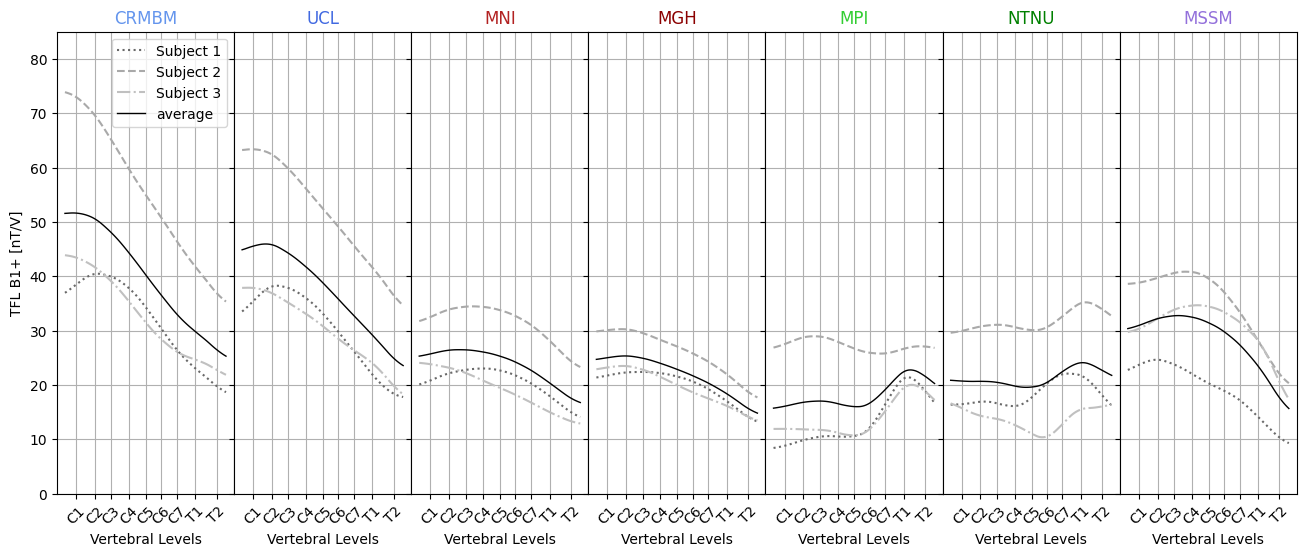

Subject-averaged TFL B1+ [nT/V] averaged along SC: ('CRMBM', 'UCL', 'MNI', 'MGH', 'MPI', 'NTNU', 'MSSM') (39.9335625643198, 37.39520485693808, 23.676592327789862, 21.882446501465925, 18.161528734825023, 21.302348028636285, 28.333119881585876) 

Subject-averaged TFL B1+ [nT/V] std along SC: ('CRMBM', 'UCL', 'MNI', 'MGH', 'MPI', 'NTNU', 'MSSM') (9.00999630691045, 7.376676477717135, 3.0524725187040973, 3.292230733805046, 2.3954373431354434, 1.4432340057926074, 5.050655229446446) 



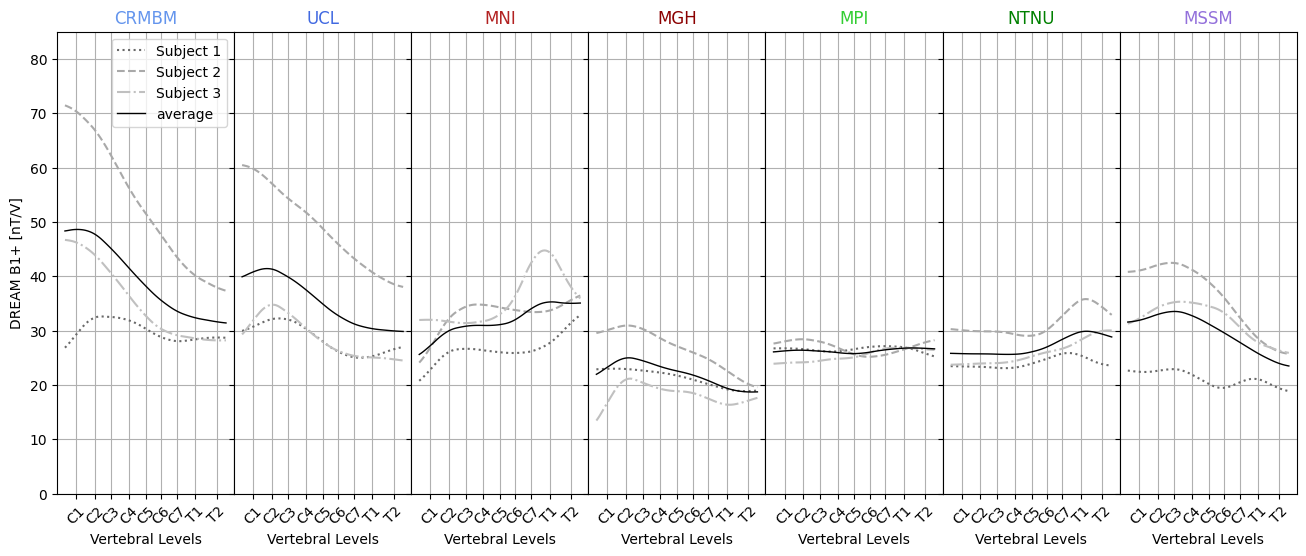

Subject-averaged DREAM B1+ [nT/V] averaged along SC: ('CRMBM', 'UCL', 'MNI', 'MGH', 'MPI', 'NTNU', 'MSSM') (39.366143185409655, 35.354481657720214, 31.799873461619796, 22.031629586886925, 26.308134939395437, 27.11187245474822, 29.77876290722976) 

Subject-averaged DREAM B1+ [nT/V] std along SC: ('CRMBM', 'UCL', 'MNI', 'MGH', 'MPI', 'NTNU', 'MSSM') (6.427246411635125, 4.402196450459214, 2.659915872844709, 2.0887872297406487, 0.32201970766963955, 1.641631363157416, 3.3251616756091043) 



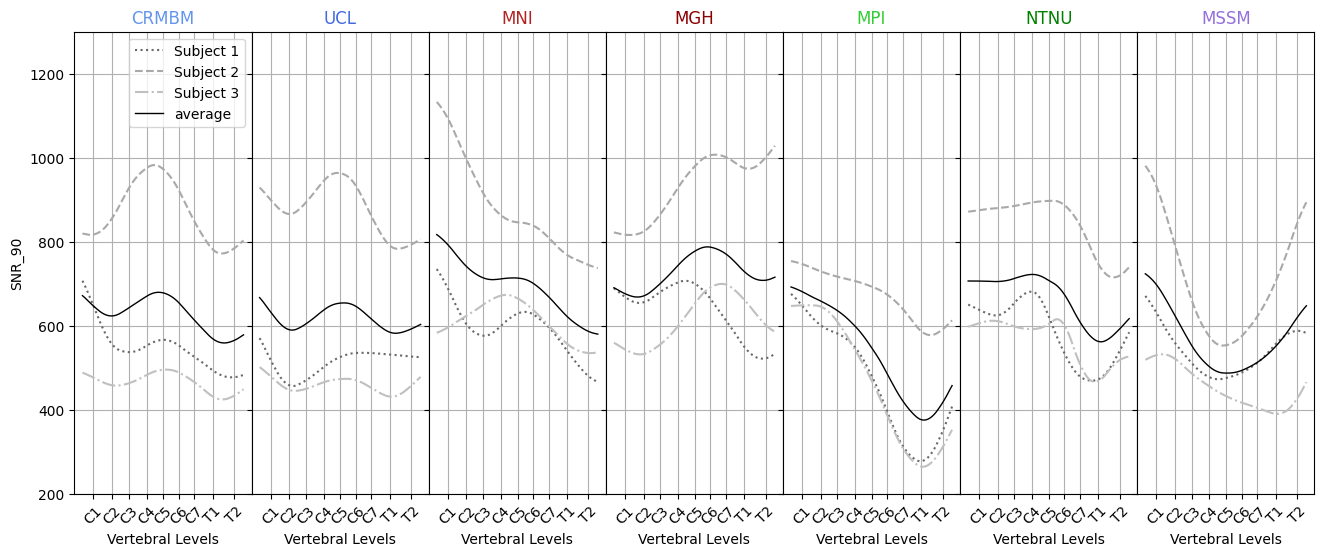

Subject-averaged SNR_90 averaged along SC: ('CRMBM', 'UCL', 'MNI', 'MGH', 'MPI', 'NTNU', 'MSSM') (627.011418792143, 616.7775948111642, 693.6088188459794, 726.4828012188493, 535.2657292997474, 663.1814153153305, 566.8045667663952) 

Subject-averaged SNR_90 std along SC: ('CRMBM', 'UCL', 'MNI', 'MGH', 'MPI', 'NTNU', 'MSSM') (39.66589825880124, 25.40296562421435, 62.90655073397115, 39.75781780272653, 111.84442026363448, 58.8456623120706, 71.22951171984255) 



In [21]:
sites = ["CRMBM", "UCL", "MNI", "MGH", "MPI", "NTNU", "MSSM"]
site_colors = ['cornflowerblue', 'royalblue', 'firebrick', 'darkred', 'limegreen', 'green', 'mediumpurple']

subject_names = ["Subject 1", "Subject 2", "Subject 3", "average"]
sub_linestyles = ['dotted','dashed','dashdot']
sub_colors = ['dimgray','darkgray','silver']

# figure types
fig_types = ["TFL B1+ [nT/V]", "DREAM B1+ [nT/V]", "SNR_90"]
    
for data_type, data_stats_type, fig_type in zip(data, data_stats, fig_types):
    
    avg_data = {'CRMBM': 0, 'UCL': 0, 'MNI': 0, 'MGH': 0, 'MPI': 0, 'NTNU': 0, 'MSSM': 0}
   
    fig = plt.figure()
    gs = fig.add_gridspec(1, len(sites), wspace=0)
    axs = gs.subplots(sharex=True, sharey=True)
    fig.set_size_inches(16, 6)

    j = 0
    i = 0    
    for k, site in enumerate(sites):    
        l = 0
        while i < (j+3):
            axs[k].plot(data_type[site][subjects[i]],color=sub_colors[l], linestyle=sub_linestyles[l])
            avg_data[site] += data_type[site][subjects[i]]
            l += 1
            i += 1
        j += 3
        
        avg_data[site] = avg_data[site]/3
        
        axs[k].plot(avg_data[site],color="black",linestyle='solid',linewidth=1)
        axs[k].set_title(sites[k], color=site_colors[k])
        axs[k].grid()
    
    axs[0].legend(subject_names,loc="upper right")

    for ax in axs.flat:
        ax.set(xlabel='Vertebral Levels', ylabel=fig_type, xticks=100*label_positions, xticklabels=vertebral_levels)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')

    if fig_type=="SNR_90":
        ax.set_ylim(200, 1300)
    else:
        ax.set_ylim(0, 85)  
        
    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

    plt.show()

    
    print('Subject-averaged', fig_type,'averaged along SC:',*zip(*{k: np.mean(v) for k, v in avg_data.items()}.items()),'\n')
    print('Subject-averaged', fig_type,'std along SC:',*zip(*{k: np.std(v) for k, v in avg_data.items()}.items()),'\n')


In [56]:
# print some stats
# to do: automate this 

print("CRMBM std across subjects of mean TFL B1+ along SC: ",np.std([data_stats[0][0][2],data_stats[0][1][2],data_stats[0][2][2]]))
print("UCL std across subjects of mean TFL B1+ along SC: ",np.std([data_stats[0][3][2],data_stats[0][4][2],data_stats[0][5][2]]))
print("MNI std across subjects of mean TFL B1+ along SC: ",np.std([data_stats[0][6][2],data_stats[0][7][2],data_stats[0][8][2]]))
print("MGH std across subjects of mean TFL B1+ along SC: ",np.std([data_stats[0][9][2],data_stats[0][10][2],data_stats[0][11][2]]))
print("MPI std across subjects of mean TFL B1+ along SC: ",np.std([data_stats[0][12][2],data_stats[0][13][2],data_stats[0][14][2]]))
print("NTNU std across subjects of mean TFL B1+ along SC: ",np.std([data_stats[0][15][2],data_stats[0][16][2],data_stats[0][17][2]]))
print("MSSM std across subjects of mean TFL B1+ along SC: ",np.std([data_stats[0][18][2],data_stats[0][19][2],data_stats[0][20][2]]))

print("\n")

print("CRMBM std across subjects of mean DREAM B1+ along SC: ",np.std([data_stats[1][0][2],data_stats[1][1][2],data_stats[1][2][2]]))
print("UCL std across subjects of mean DREAM B1+ along SC: ",np.std([data_stats[1][3][2],data_stats[1][4][2],data_stats[1][5][2]]))
print("MNI std across subjects of mean DREAM B1+ along SC: ",np.std([data_stats[1][6][2],data_stats[1][7][2],data_stats[1][8][2]]))
print("MGH std across subjects of mean DREAM B1+ along SC: ",np.std([data_stats[1][9][2],data_stats[1][10][2],data_stats[1][11][2]]))
print("MPI std across subjects of mean DREAM B1+ along SC: ",np.std([data_stats[1][12][2],data_stats[1][13][2],data_stats[1][14][2]]))
print("NTNU std across subjects of mean DREAM B1+ along SC: ",np.std([data_stats[1][15][2],data_stats[1][16][2],data_stats[1][17][2]]))
print("MSSM std across subjects of mean DREAM B1+ along SC: ",np.std([data_stats[1][18][2],data_stats[1][19][2],data_stats[1][20][2]]))

print("\n")

print("CRMBM std across subjects: ",np.mean([np.std([data_stats[0][0][2],data_stats[0][1][2],data_stats[0][2][2]]),np.std([data_stats[1][0][2],data_stats[1][1][2],data_stats[1][2][2]])]))
print("UCL std across subjects: ",np.mean([np.std([data_stats[0][3][2],data_stats[0][4][2],data_stats[0][5][2]]),np.std([data_stats[1][3][2],data_stats[1][4][2],data_stats[1][5][2]])]))
print("MNI std across subjects: ",np.mean([np.std([data_stats[0][6][2],data_stats[0][7][2],data_stats[0][8][2]]),np.std([data_stats[1][6][2],data_stats[1][7][2],data_stats[1][8][2]])]))
print("MGH std across subjects: ",np.mean([np.std([data_stats[0][9][2],data_stats[0][10][2],data_stats[0][11][2]]),np.std([data_stats[1][9][2],data_stats[1][10][2],data_stats[1][11][2]])]))
print("MPI std across subjects: ",np.mean([np.std([data_stats[0][12][2],data_stats[0][13][2],data_stats[0][14][2]]),np.std([data_stats[1][12][2],data_stats[1][13][2],data_stats[1][14][2]])]))
print("NTNU std across subjects: ",np.mean([np.std([data_stats[0][15][2],data_stats[0][16][2],data_stats[0][17][2]]),np.std([data_stats[1][15][2],data_stats[1][16][2],data_stats[1][17][2]])]))
print("MSSM std across subjects: ",np.mean([np.std([data_stats[0][18][2],data_stats[0][19][2],data_stats[0][20][2]]),np.std([data_stats[1][18][2],data_stats[1][19][2],data_stats[1][20][2]])]))


CRMBM std across subjects of mean TFL B1+ along SC:  10.86700404710748
UCL std across subjects of mean TFL B1+ along SC:  10.095537026317679
MNI std across subjects of mean TFL B1+ along SC:  5.396384441371968
MGH std across subjects of mean TFL B1+ along SC:  2.9424142354898906
MPI std across subjects of mean TFL B1+ along SC:  6.417458776616932
NTNU std across subjects of mean TFL B1+ along SC:  7.494834640476877
MSSM std across subjects of mean TFL B1+ along SC:  6.551542206421849


CRMBM std across subjects of mean DREAM B1+ along SC:  9.894036726988167
UCL std across subjects of mean DREAM B1+ along SC:  9.581404242153464
MNI std across subjects of mean DREAM B1+ along SC:  3.7156691641358024
MGH std across subjects of mean DREAM B1+ along SC:  3.441596147204
MPI std across subjects of mean DREAM B1+ along SC:  0.6952718311030094
NTNU std across subjects of mean DREAM B1+ along SC:  3.0984211109787254
MSSM std across subjects of mean DREAM B1+ along SC:  6.196707004029157


CRMBM 

### Generate plots of B1+ and SNR per vertebral levels

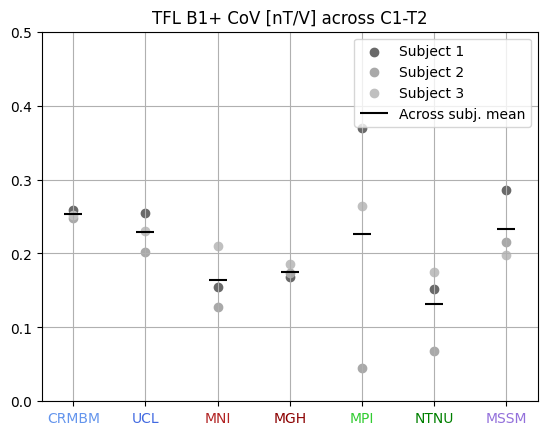

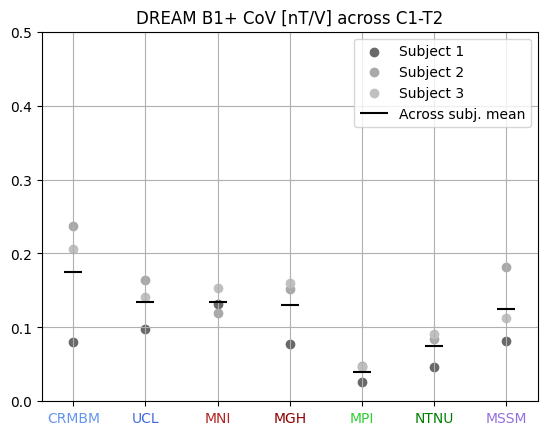

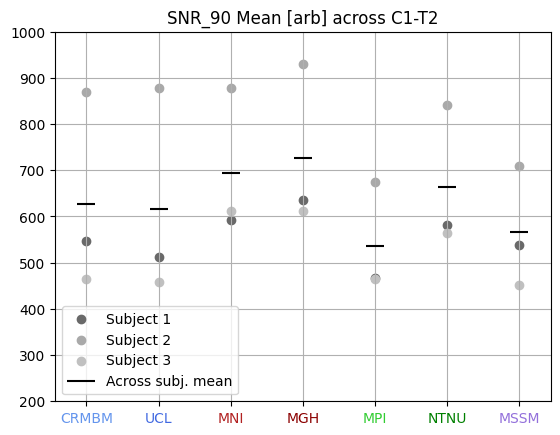

In [6]:
# figure types
site_colors = ['cornflowerblue', 'royalblue', 'firebrick', 'darkred', 'limegreen', 'green', 'mediumpurple']
fig_types = ["TFL B1+ CoV [nT/V] across C1-T2", "DREAM B1+ CoV [nT/V] across C1-T2", "SNR_90 Mean [arb] across C1-T2"]
subject_names = ["Subject 1", "Subject 2", "Subject 3"]
sub_colors = ['dimgray','darkgray','silver']

for data_stats_type, fig_type in zip(data_stats,fig_types):
    
    series = [data_stats_type[i::len(subject_names)] for i in range(len(subject_names))]
    hline_x = np.arange(len(sites))
    hline_width = 0.25
    stat_metric = np.zeros((len(subject_names),len(sites)))
    fig, ax = plt.subplots()

    i = 0
    for subject_name, subject_series in zip(subject_names, series): 
        if fig_type == "SNR_90 Mean [arb] across C1-T2":
            # Compute mean across levels
            metric_indiv = [subject_series[j][2] for j in range(len(sites))]
        else:
            # Compute CoV across levels
            metric_indiv = [subject_series[j][3]/subject_series[j][2] for j in range(len(sites))]
        ax.scatter(sites, metric_indiv, label=subject_name, color=sub_colors[i])
        for xtick, site_color in zip(ax.get_xticklabels(), site_colors):
            xtick.set_color(site_color)        
        for j in range(len(sites)):
            if fig_type == "SNR_90 Mean [arb] across C1-T2":
                # Compute mean across levels and subjects
                stat_metric[i][j] = subject_series[j][2]
            else:
                # Compute CoV across levels and subjects
                stat_metric[i][j] = subject_series[j][3]/subject_series[j][2]
        i+=1
    
    plt.hlines(np.mean(stat_metric, axis=0),hline_x - hline_width/2, hline_x + hline_width/2, color="black", label="Across subj. mean")
        
    ax.legend()
    if fig_type=="SNR_90 Mean [arb] across C1-T2":
        ax.set_ylim(200, 1000)
        #ax.get_legend().remove()
    else:
        ax.set_ylim(0, 0.5)     
    ax.set_title(fig_type)

    plt.grid()


## Generate maps

Generate figures for B1+, SNR, and 1/g-factor maps obtained at each site (for one representative subject)

### Co-register maps to reference site

In [ ]:
# Co-register subjects across sites for better visualisation

sites = ["CRMBM", "UCL", "MNI", "MGH", "MPI", "NTNU", "MSSM"]
subject_id = '3'  # Subject number to generate figures from
site_ref = 'CRMBM'
vert_labels = '3'  # vertebral levels for alignment between sites

files_anat = ["acq-anat_TB1TFL", "acq-famp_TB1DREAM","acq-coilQaSagLarge_SNR_T0000"]  # image that serves as a reference to get the segmentation
files_metric = ["TFLTB1map", "DREAMTB1avgB1map","acq-coilQaSagLarge_SNR_T0000"]  # coilQA image to display on the figure

for site in sites:
    print(f"👉 PROCESSING: {site}{subject_id}")
    for file_anat, file_metric in zip(files_anat, files_metric):
        os.chdir(os.path.join(path_data, "sub-"+site+subject_id, "fmap"))
        # Extract vertebral labels
        !sct_label_utils -i sub-{site}{subject_id}_{file_anat}_seg_labeled-UNIT1reg.nii.gz -vert-body {vert_labels} -o sub-{site}{subject_id}_{file_anat}_labels.nii.gz
        # Co-register data to reference subject
        if site != "CRMBM":
            !sct_register_multimodal \
                -i sub-{site}{subject_id}_{file_metric}.nii.gz \
                -iseg sub-{site}{subject_id}_{file_anat}_seg.nii.gz \
                -ilabel sub-{site}{subject_id}_{file_anat}_labels.nii.gz \
                -d ../../sub-{site_ref}{subject_id}/fmap/sub-{site_ref}{subject_id}_{file_metric}.nii.gz \
                -dseg ../../sub-{site_ref}{subject_id}/fmap/sub-{site_ref}{subject_id}_{file_anat}_seg.nii.gz \
                -dlabel ../../sub-{site_ref}{subject_id}/fmap/sub-{site_ref}{subject_id}_{file_anat}_labels.nii.gz \
                -param step=0,type=label,dof=Tx_Ty_Tz:step=1,type=seg,iter=0 \
                -x nn

### Align spinal cord with the medial plane

For visualization purpose, such that the sagittal views show the spinal cord throughout the whole superior-inferior axis.

In [ ]:
# Flatten the spinal cord (ie, being it into the sagittal midline)

for site in sites:
    print(f"👉 PROCESSING: {site}{subject_id}")
    for file_anat, file_metric in zip(files_anat, files_metric):
        os.chdir(os.path.join(path_data, "sub-"+site+subject_id, "fmap"))
        if site == site_ref:
            suffix = ""
        else:
            suffix = "_reg"
        # Flatten the spinal cord in the sagittal plane
        !sct_flatten_sagittal -i sub-{site}{subject_id}_{file_metric}{suffix}.nii.gz -s ../../sub-{site_ref}{subject_id}/fmap/sub-{site_ref}{subject_id}_{file_anat}_seg.nii.gz

### Generate B1+ and SNR maps

In [7]:
site_colors = ['cornflowerblue', 'royalblue', 'firebrick', 'darkred', 'limegreen', 'green', 'mediumpurple']

# legend types
legend_types = ["[nT/V]", "[nT/V]", "[arb]", "[arb]", "[arb]"]

# Define the slicing indices for each combination of file_metric and ind_subject
# The indices are defined as (x(min, max), y(min, max))
slicing_indices = {
    "TFLTB1map": {
        '1': (slice(31, 82), slice(43, 93)),
        '2': (slice(28, 71), slice(37, 94)),
        '3': (slice(25, 77), slice(35, 100))
    },
    "DREAMTB1avgB1map": {
        '1': (slice(29, 60), slice(13, 66)),
        '2': (slice(20, 65), slice(6, 56)),
        '3': (slice(25, 72), slice(0, 60))
    },
    "acq-coilQaSagLarge_SNR_T0000": {
        '1': (slice(224, 302), slice(213, 292)),
        '2': (slice(224, 302), slice(197, 289)),
        '3': (slice(100, 178), slice(55, 160))
    }
}

# Define the dynmax values for each file_metric
dynmax_values = {
    "TFLTB1map": 60,
    "DREAMTB1avgB1map": 60,
    "acq-coilQaSagLarge_SNR_T0000": 200
}

for file_metric, legend_type in zip(files_metric, legend_types):
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(2, 4)#, figsize=(10, 8))
    font_size = 12
    axes=axes.flatten() 
    for i,site in enumerate(sites):
        # Load data
        os.chdir(os.path.join(path_data, f"sub-{site}{subject_id}", "fmap"))
        if site == site_ref:
            suffix = ""
        else:
            suffix = "_reg"
        map = nib.load(f"sub-{site}{subject_id}_{file_metric}{suffix}_flatten.nii.gz")
        # map = nib.load(f"sub-{site}{ind_subject}_{file_metric}{suffix}.nii.gz")
        slices = slicing_indices[file_metric][subject_id]
        data = map.get_fdata()[slices[0], slices[1], round(map.get_fdata().shape[2] / 2)]

        # Figure configuration
        axes[-1].axis('off') 
        # Defining dynamic range
        axes[-1].axis('off')            
        dynmin = 0 
        dynmax = dynmax_values[file_metric]
        splot=axes[i]
        im = splot.imshow((data.T), cmap='viridis', origin='lower',vmin=dynmin,vmax=dynmax)
        splot.set_title(site, size=font_size,color=site_colors[i])
        splot.axis('off')
    
    plt.tight_layout()

    # Colorbar
    # Assume that the colorbar should start at the bottom of the lower row of subplots and
    # extend to the top of the upper row of subplots
    cbar_bottom = 0.25  # This might need adjustment
    cbar_height = 0.5  # This represents the total height of both rows of subplots
    cbar_dist = 1.01
    cbar_ax = fig.add_axes([cbar_dist, cbar_bottom, 0.03, cbar_height])
    cbar = plt.colorbar(im, cax=cbar_ax)

    cbar_ax.set_title(legend_type, size=12)
    plt.show()


NameError: name 'files_metric' is not defined

### Generate g-factor maps

In [ ]:
# map types
map_types = ["acq-coilQaSagSmall_GFactor", "T2starw"]

# legend types
legend_types = ["1/g", "[arb]"]

# Select individual subject to show
ind_subject = '2'  # Here we select subject 2 because it has the most complete data

mean_gfac = {}
max_gfac = {}

for map_type, legend_type in zip(map_types,legend_types):
    
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(2, 4, figsize=(10, 8))
    font_size = 12
    axes=axes.flatten() 

    for i,site in enumerate(sites):
        # Load data
        if map_type=="T2starw":
            os.chdir(os.path.join(path_data, f"sub-{site}{ind_subject}", "anat"))
            map=nib.load(f"sub-{site}{ind_subject}_{map_type}.nii.gz")
            data=map.get_fdata()[:,:,round(map.get_fdata().shape[2]/2)]
        else:         
            os.chdir(os.path.join(path_data, f"sub-{site}{ind_subject}", "fmap"))
            map=nib.load(f"sub-{site}{ind_subject}_{map_type}.nii.gz")
            # The 4th dimension inlcudes 12 acceleration maps: 
            #['R 2','R 3', 'R 4', 'R 6', 'R 8', 'R 2 x 2', 'R 2 x 3', 'R 3 x 2', 'R 3 x 3', 'R 3 x 4', 'R 4 x 3', 'R 4 x 4']
            # show the R = 2 x 2 map
            data=(map.get_fdata()[64:191,64:191,round(map.get_fdata().shape[2]/2),5])/1000
            gfac_data=(map.get_fdata()[round(map.get_fdata().shape[0]/2)-10:round(map.get_fdata().shape[0]/2)+10,round(map.get_fdata().shape[1]/2)-10:round(map.get_fdata().shape[1]/2)+10,round(map.get_fdata().shape[2]/2),5])
            mean_gfac[site]=np.nanmean(gfac_data)/1000
            max_gfac[site]=np.max(gfac_data)/1000
    
        # Plot  
        splot=axes[i]
        dynmin = 0 
        if map_type=="acq-coilQaSagSmall_GFactor":
            dynmax = 1
            axes[-1].axis('off')
            splot.text(0, 3, r'mean 1/g='+str(round(mean_gfac[site],4)), size=10)
            #splot.text(0, 12, r'max gfac='+str(round(max_gfac[site],3)), size=10)
            
            x = [data.shape[0]/2-10, data.shape[1]/2-10] 
            y = [data.shape[0]/2-10, data.shape[1]/2+10] 
            splot.plot(x, y, color="black", linewidth=2) 
            
            x = [data.shape[0]/2-10, data.shape[1]/2+10] 
            y = [data.shape[0]/2+10, data.shape[1]/2+10] 
            splot.plot(x, y, color="black", linewidth=2) 

            x = [data.shape[0]/2+10, data.shape[1]/2+10] 
            y = [data.shape[0]/2+10, data.shape[1]/2-10] 
            splot.plot(x, y, color="black", linewidth=2)

            x = [data.shape[0]/2+10, data.shape[1]/2-10] 
            y = [data.shape[0]/2-10, data.shape[1]/2-10] 
            splot.plot(x, y, color="black", linewidth=2) 
        else:
            dynmax = 3000
            axes[-1].axis('off') 
            
        im = splot.imshow((data.T), cmap='viridis', origin='lower',vmin=dynmin,vmax=dynmax)  
        splot.set_title(site, size=font_size,color=site_colors[i])
        splot.axis('off')
    
    plt.tight_layout()

    # Colorbar
    # Assume that the colorbar should start at the bottom of the lower row of subplots and
    # extend to the top of the upper row of subplots
    cbar_bottom = 0.25  # This might need adjustment
    cbar_height = 0.5  # This represents the total height of both rows of subplots
    cbar_dist = 1.01
    cbar_ax = fig.add_axes([cbar_dist, cbar_bottom, 0.03, cbar_height])
    cbar = plt.colorbar(im, cax=cbar_ax)

    cbar_ax.set_title(legend_type, size=12)
    plt.show()


## Generate tiled figure with individual channel on GRE scans

In [ ]:
sites = ["CRMBM", "UCL", "MNI", "MGH", "MPI", "NTNU", "MSSM"]

# Select subject to show
subject = '1'  # and here we select subject 1 because it has the most complete data

        
for i,site in enumerate(sites):

    gre_files=sorted(glob.glob(os.path.join(path_data, f"sub-{site}{subject}", "anat", '*uncombined*.nii.gz')))
        
    #Tiled figure in a five-row layout
    rows=int(np.ceil(len(gre_files)/4))
    cols=int(np.ceil(len(gre_files)/rows))

    fig=plt.figure(figsize=(15, 20))
    
    ax = fig.subplots(rows,cols,squeeze=True)
    
    for row in range(rows):
        for col in range(cols):

            i = row*cols+col

            if i < len(gre_files):
            
                #read in files
                data_to_plot=(nib.load(gre_files[i])).get_fdata() #load in nifti object, get only image data
                data_to_plot=np.rot90(data_to_plot[:,:,int(np.floor(data_to_plot.shape[2]/2))]) #central slice
           
                ax[row,col].imshow(data_to_plot,cmap=plt.cm.gray,clim=[0, 300])
                ax[row,col].text(0.5, 0.05, 'Rx channel : ' + str(i+1),horizontalalignment='center', transform=ax[row,col].transAxes,color='white',fontsize=17)
                ax[row,col].axis('off')

    plt.axis('off')
    plt.subplots_adjust(hspace=0,wspace=0)
    fig.suptitle(site, fontsize=20, y=0.9)


## Finished

In [ ]:
# Indicate duration of data processing

end_time = datetime.now()
total_time = (end_time - start_time).total_seconds()

# Convert seconds to a timedelta object
total_time_delta = timedelta(seconds=total_time)

# Format the timedelta object to a string
formatted_time = str(total_time_delta)

# Pad the string representation if less than an hour
formatted_time = formatted_time.rjust(8, '0')

print(f"Total Runtime [hour:min:sec]: {formatted_time}")